##Common Imports

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

## Download Images

In [2]:
cifar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test,Y_test) = cifar100.load_data()

#convert to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

#normalize
X_train = X_train/255.0
X_test = X_test/255.0


print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


2024-12-07 19:30:08.274204: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Ultra
2024-12-07 19:30:08.274244: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2024-12-07 19:30:08.274249: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2024-12-07 19:30:08.274271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-07 19:30:08.274289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


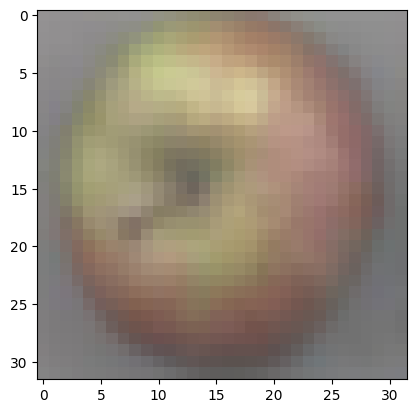

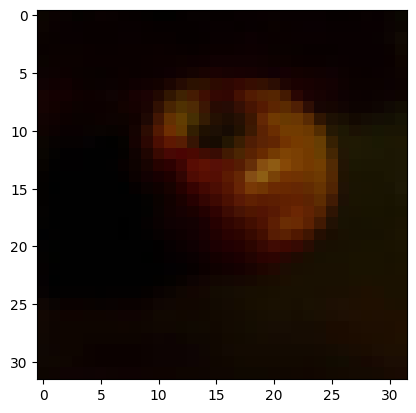

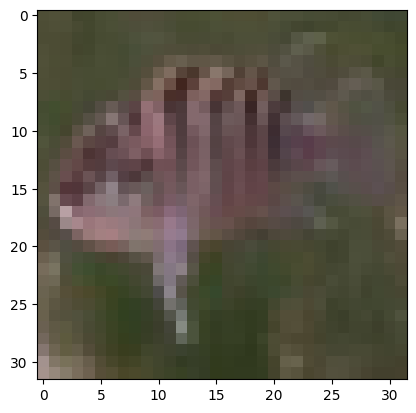

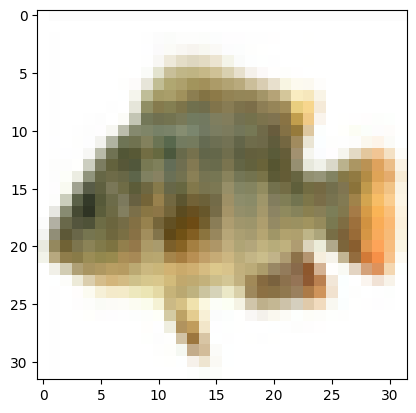

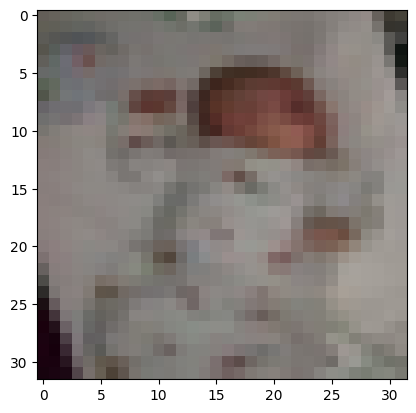

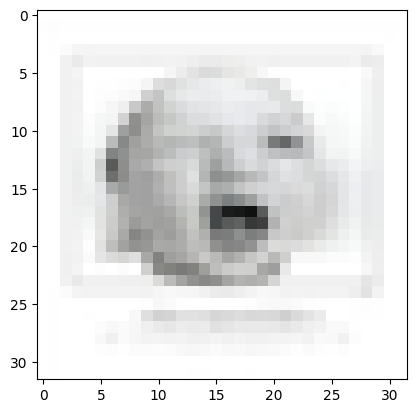

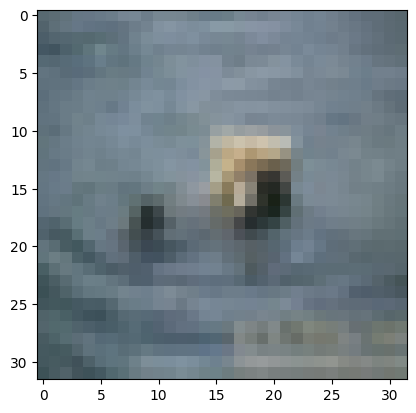

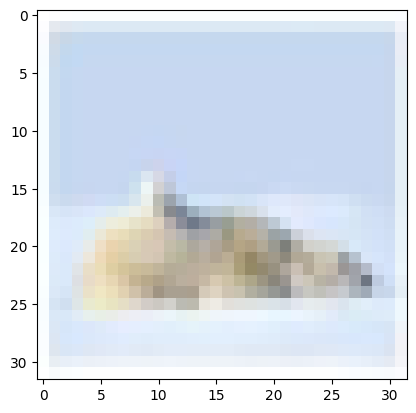

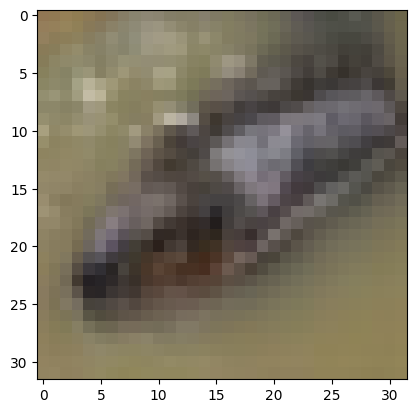

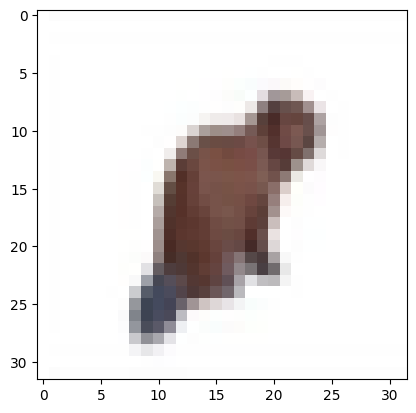

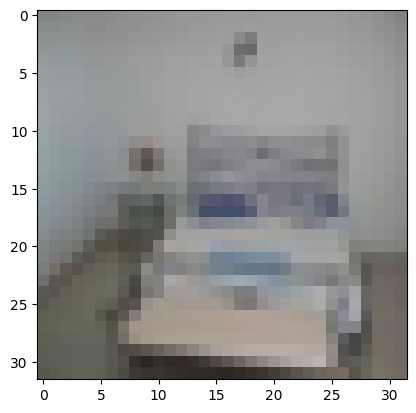

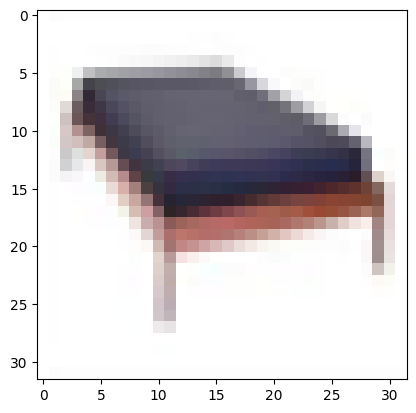

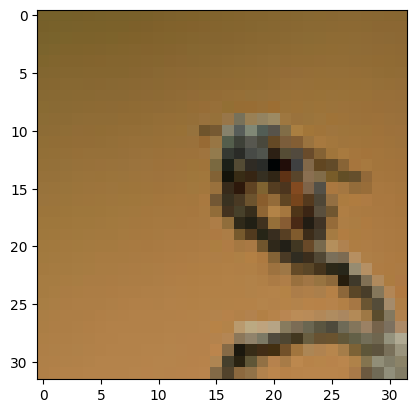

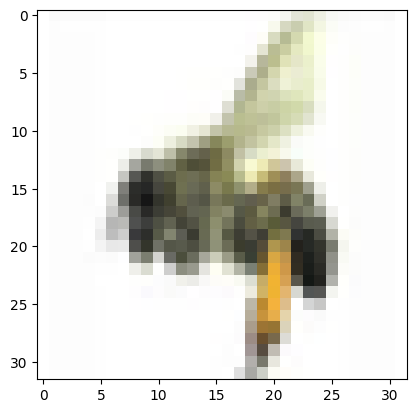

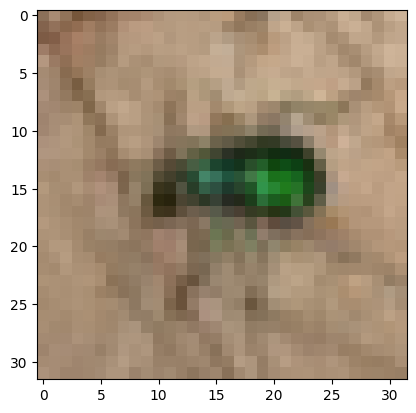

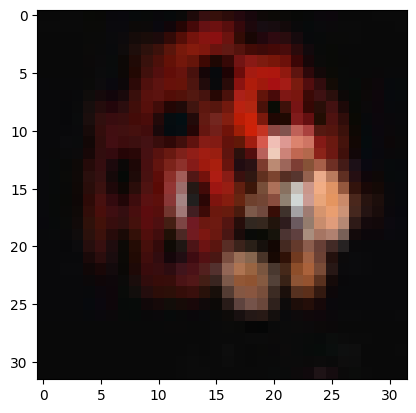

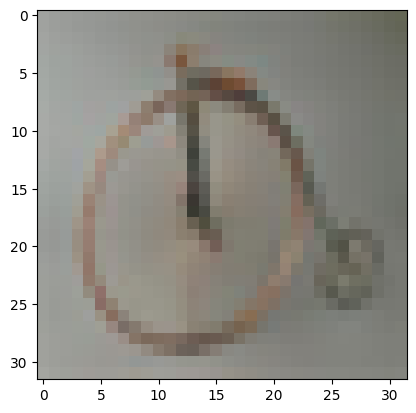

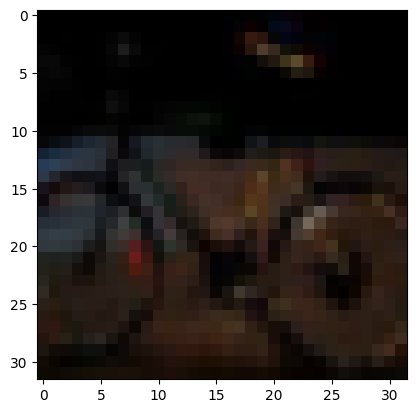

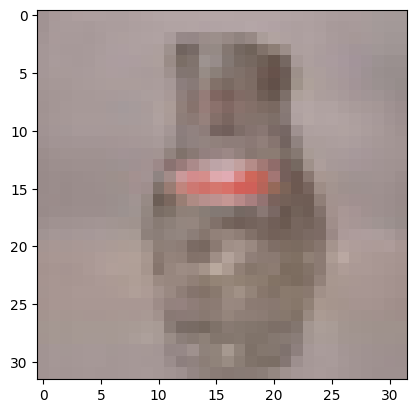

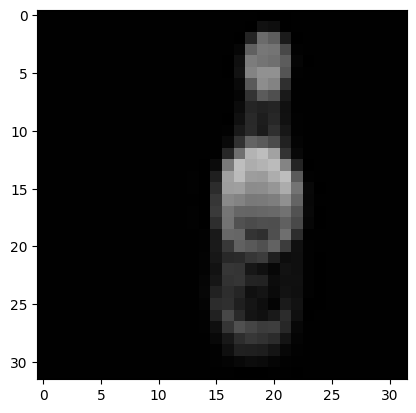

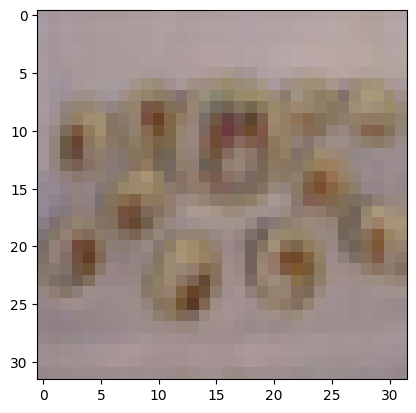

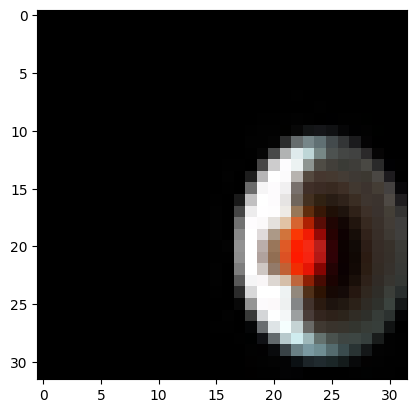

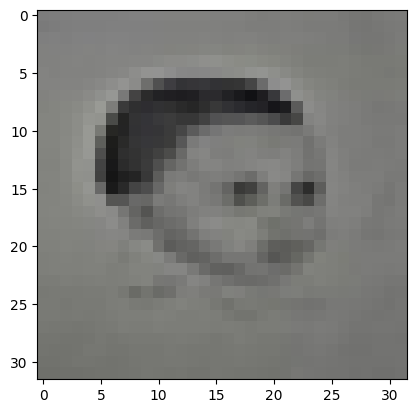

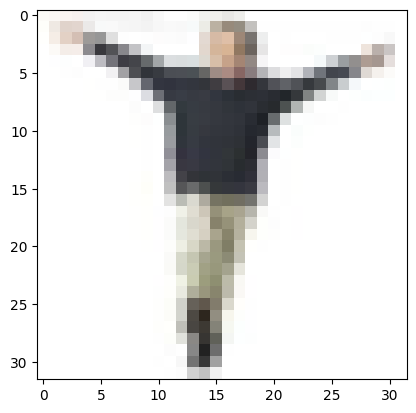

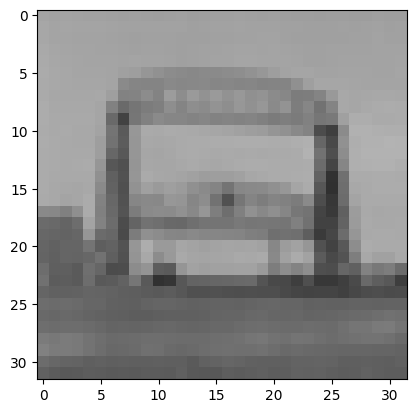

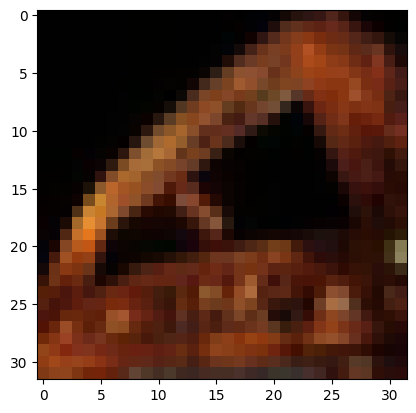

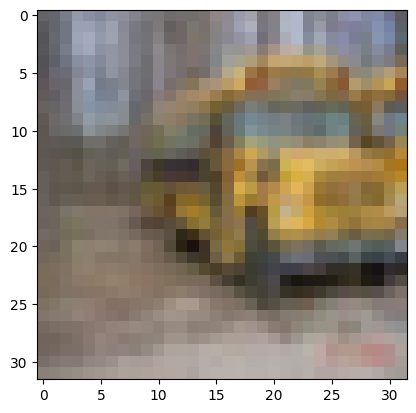

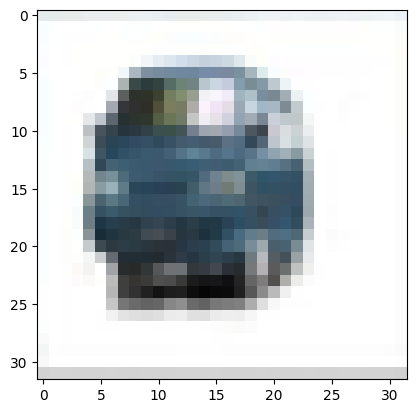

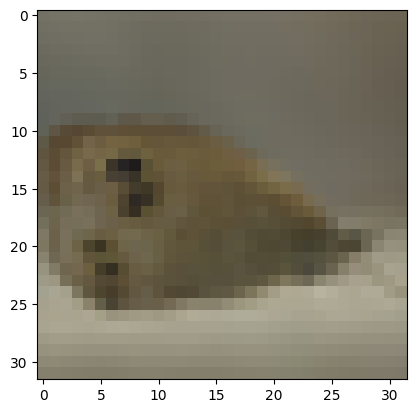

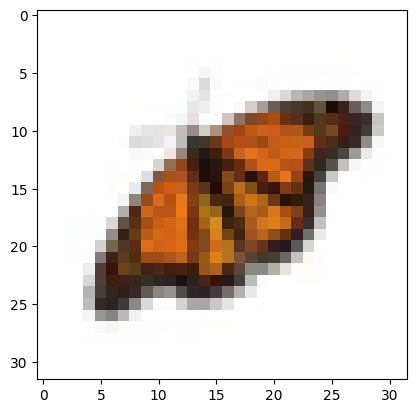

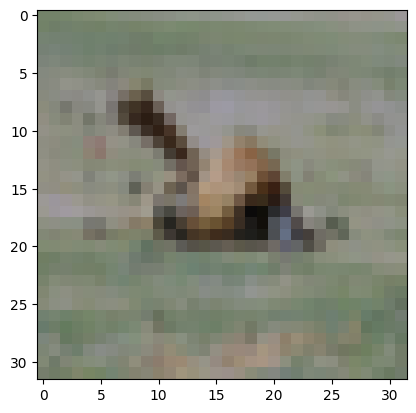

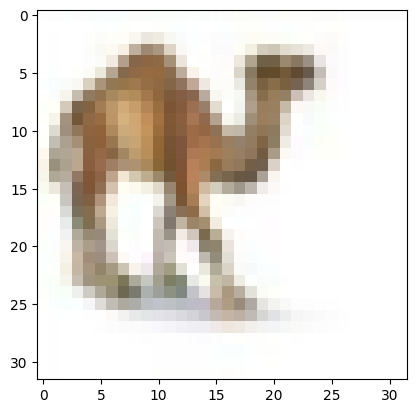

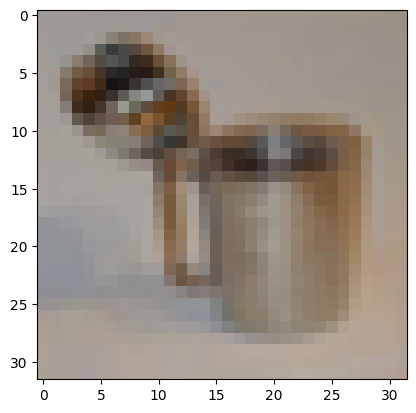

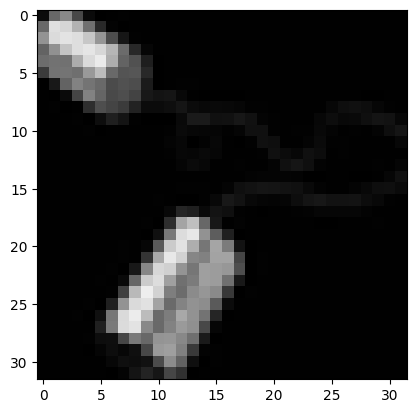

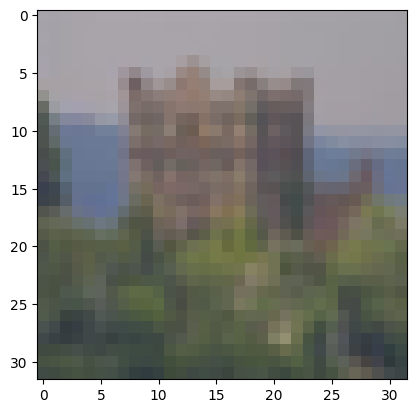

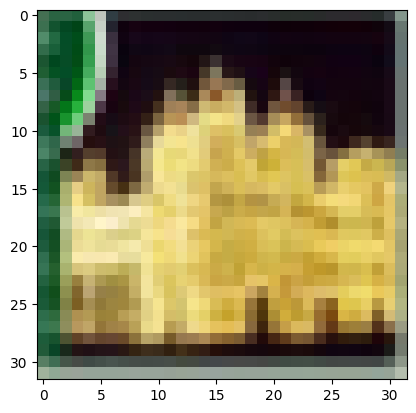

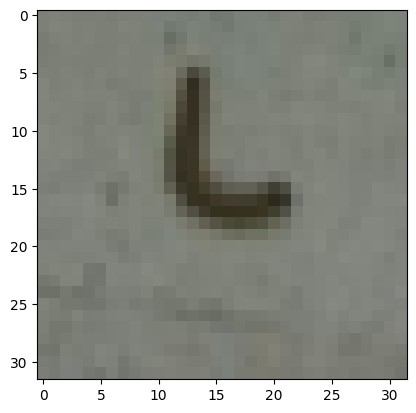

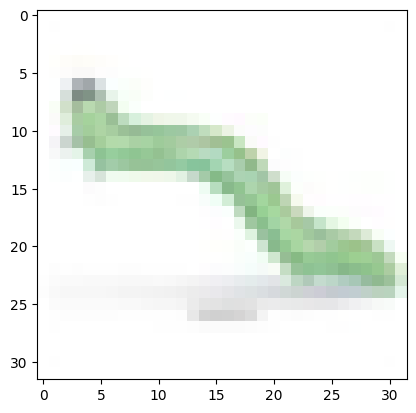

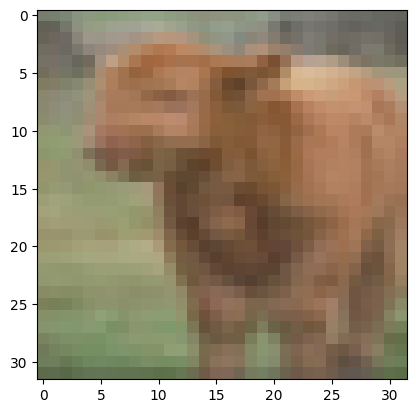

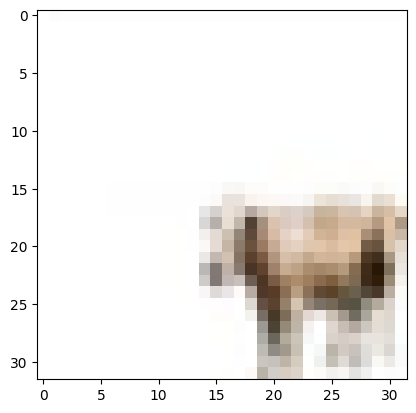

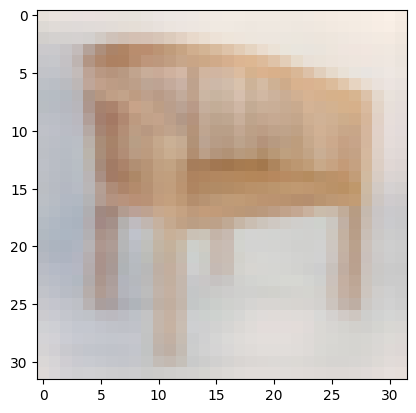

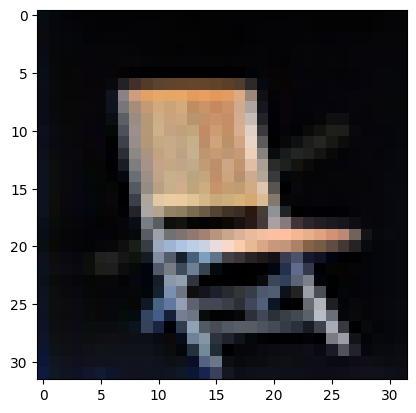

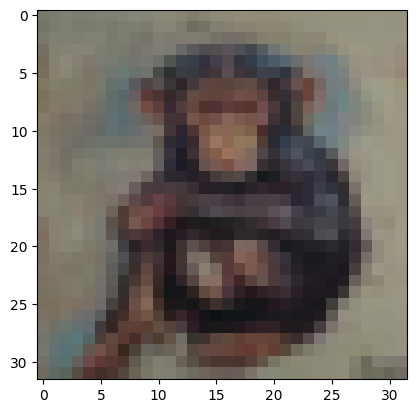

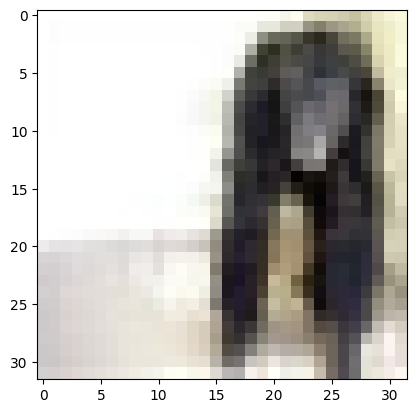

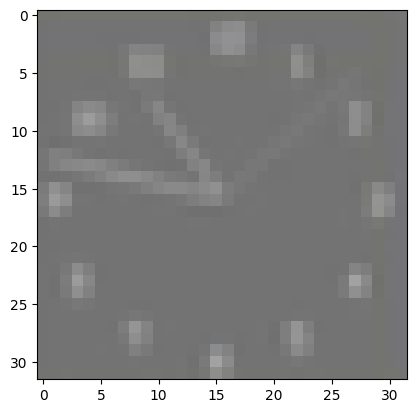

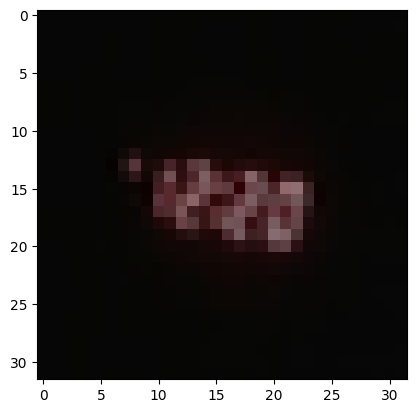

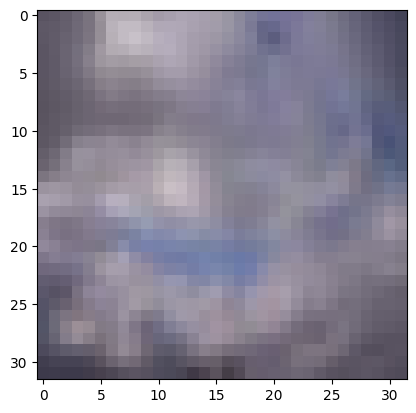

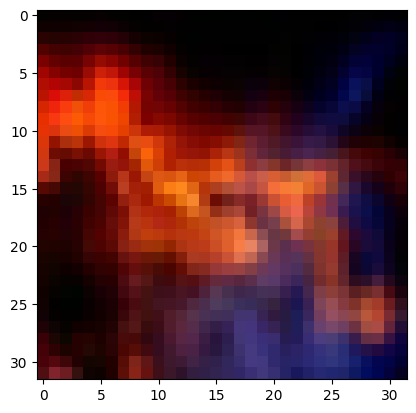

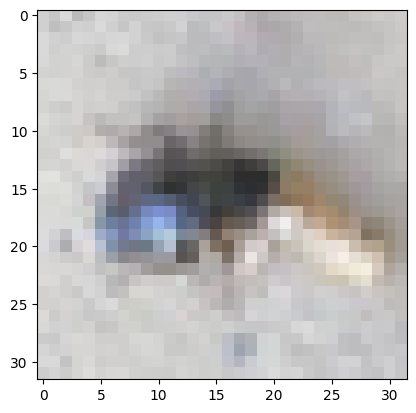

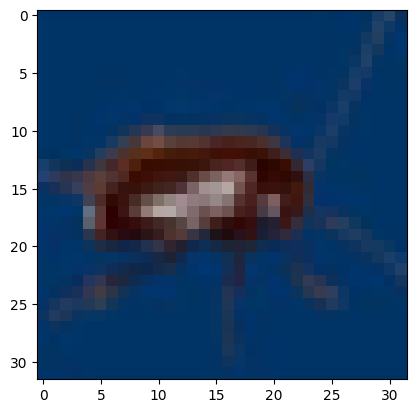

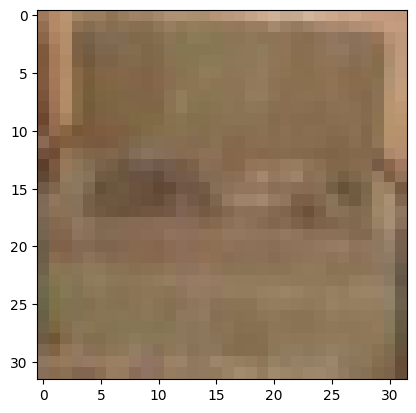

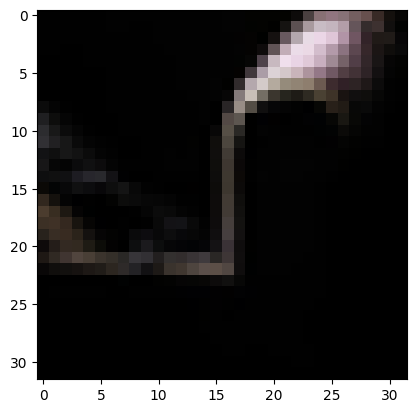

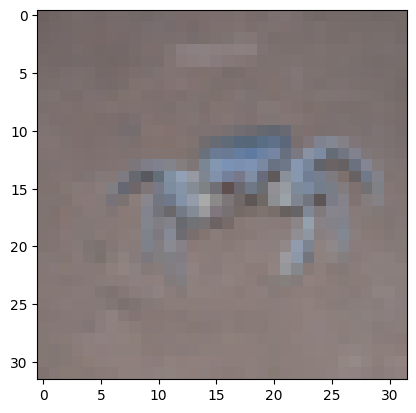

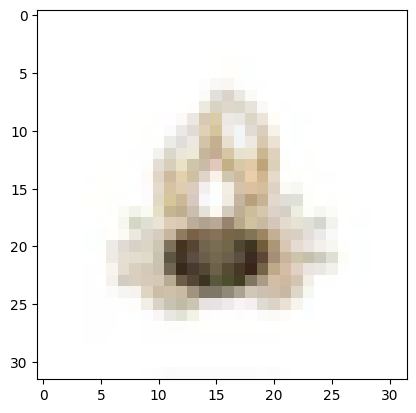

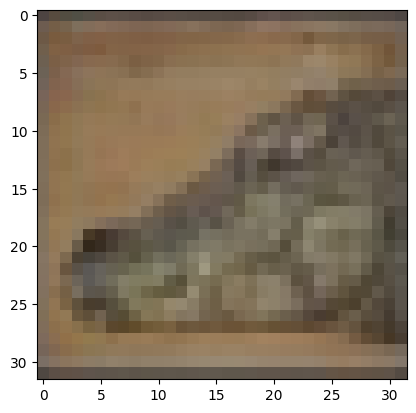

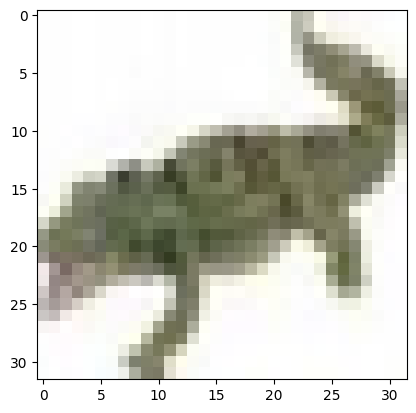

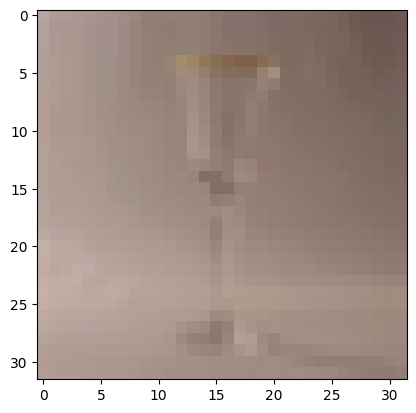

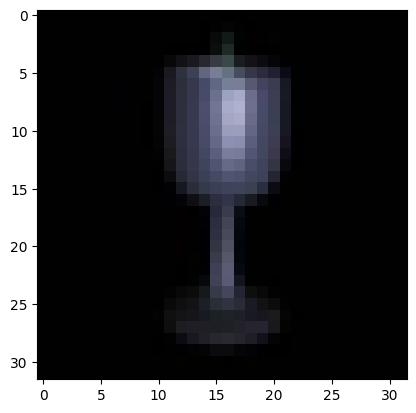

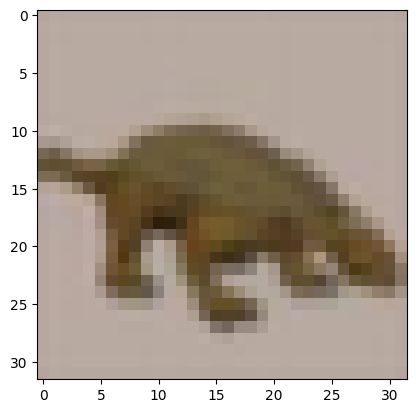

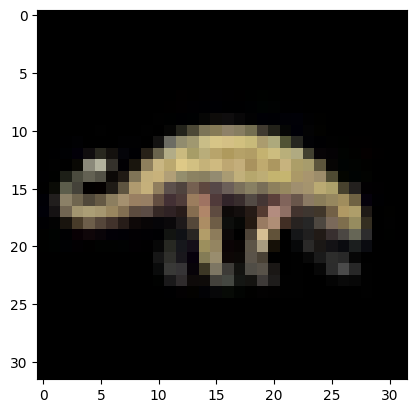

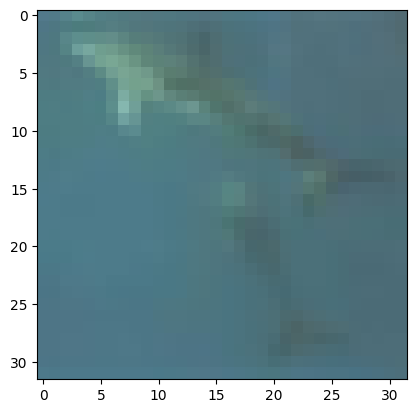

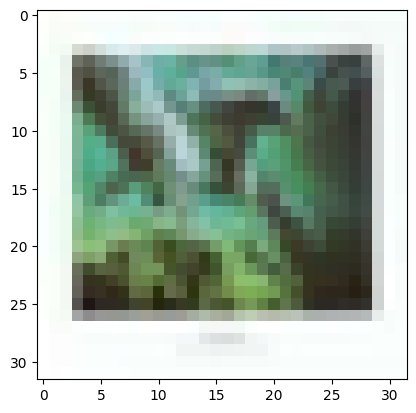

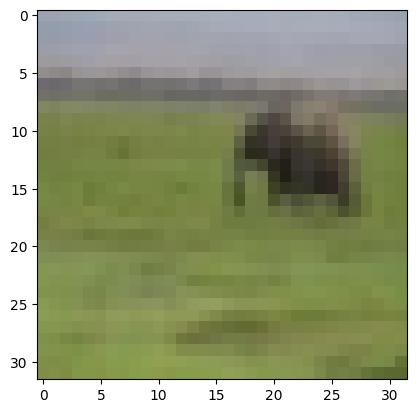

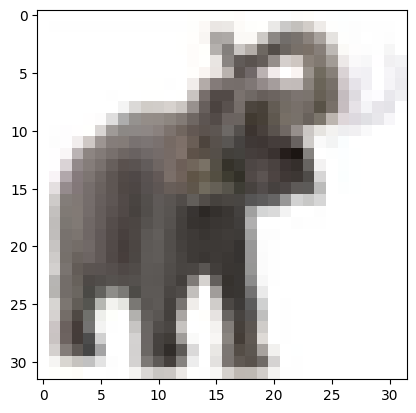

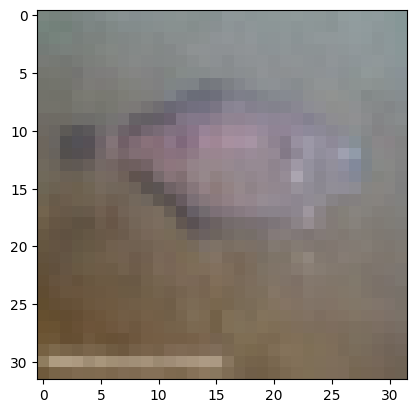

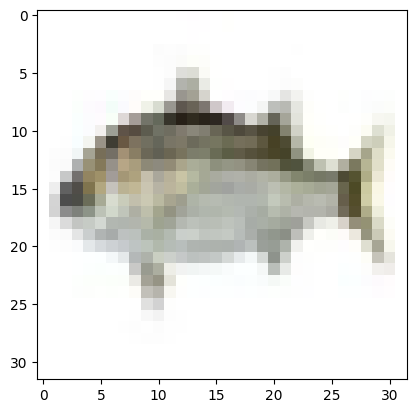

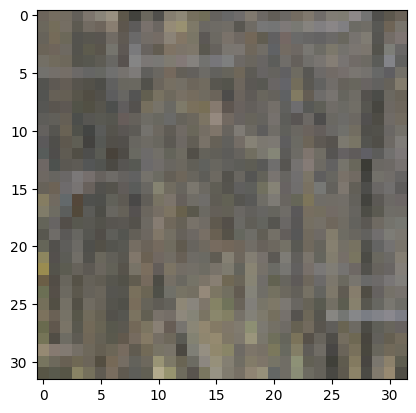

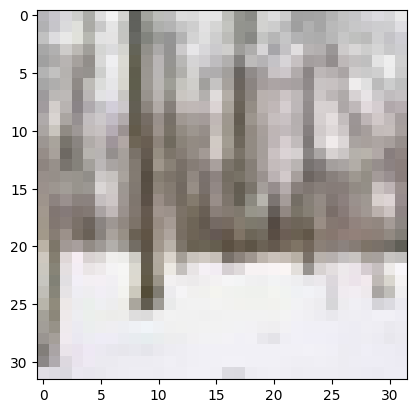

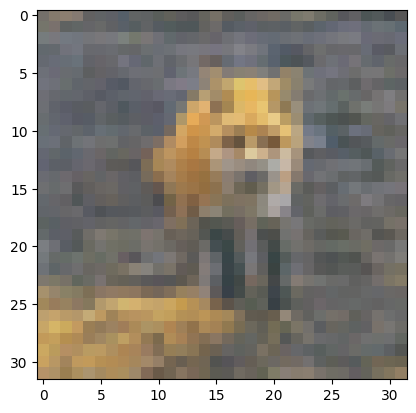

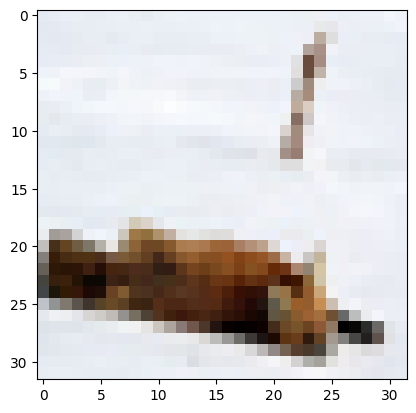

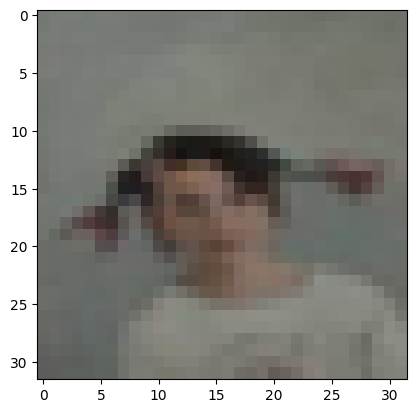

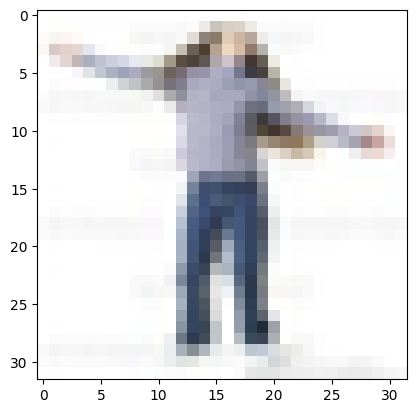

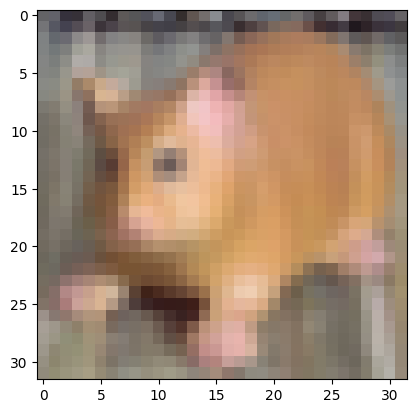

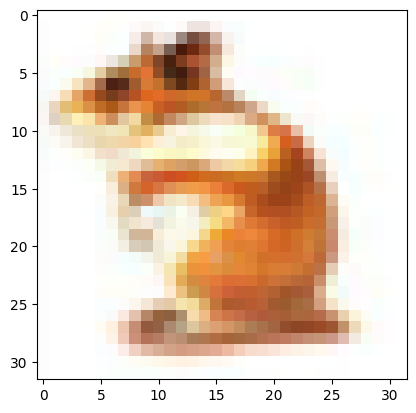

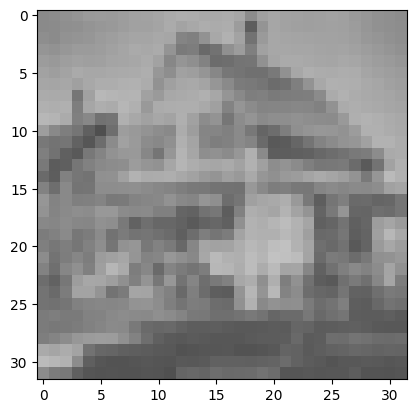

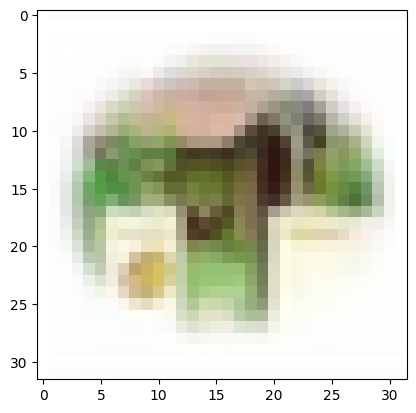

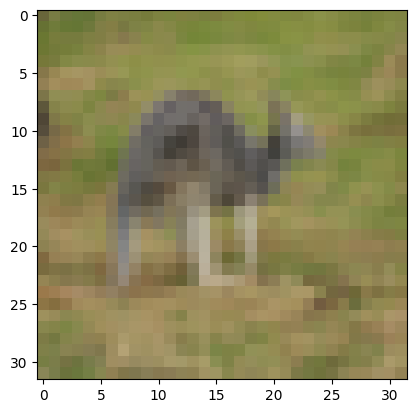

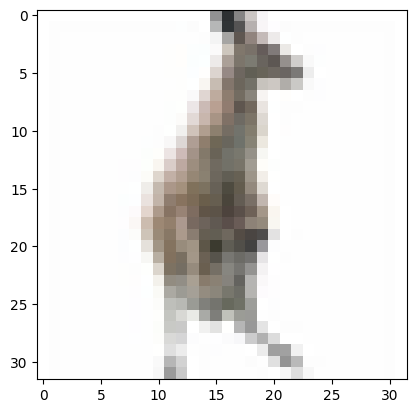

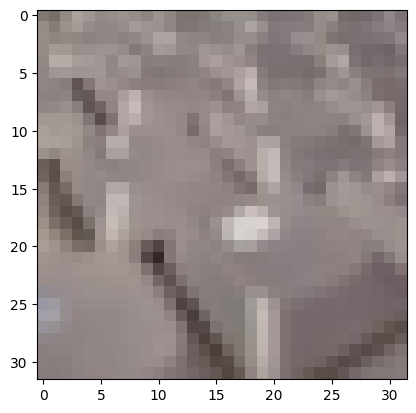

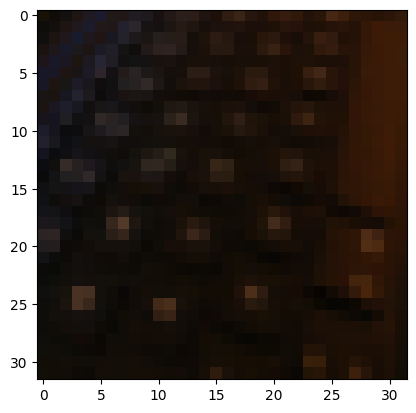

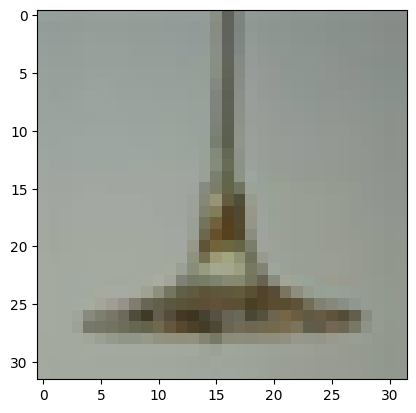

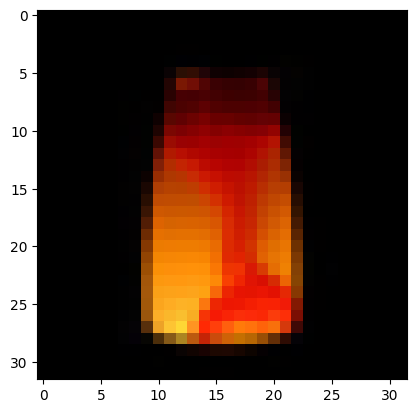

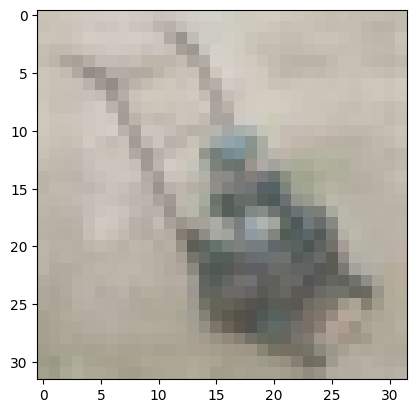

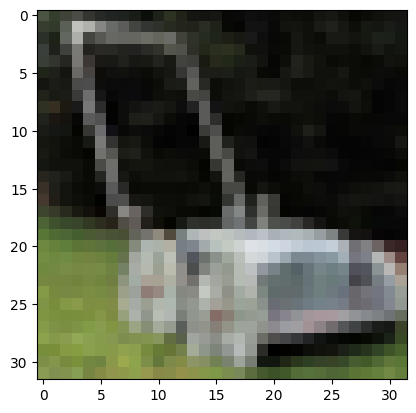

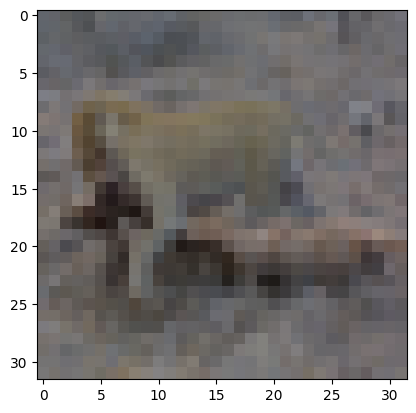

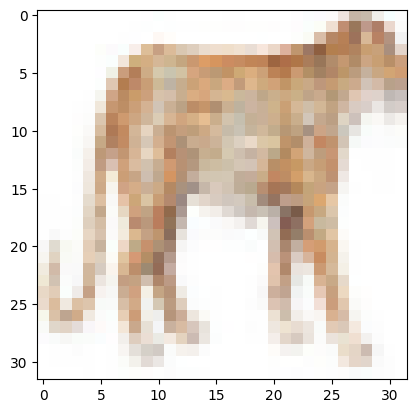

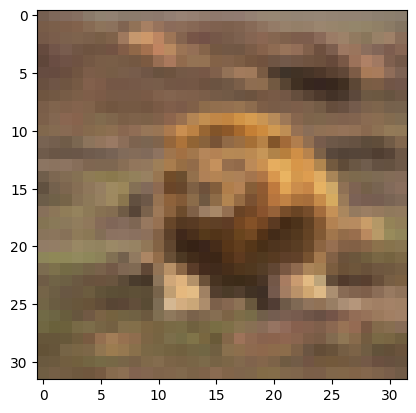

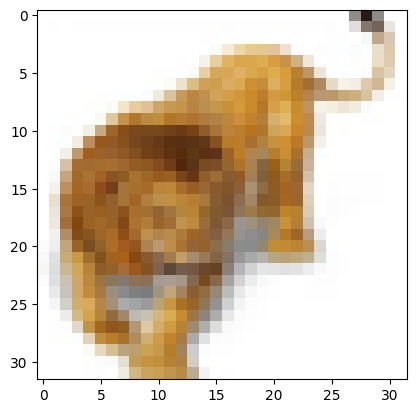

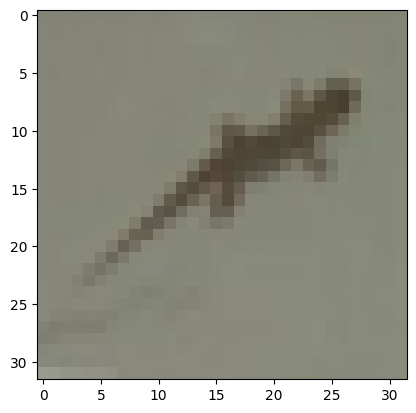

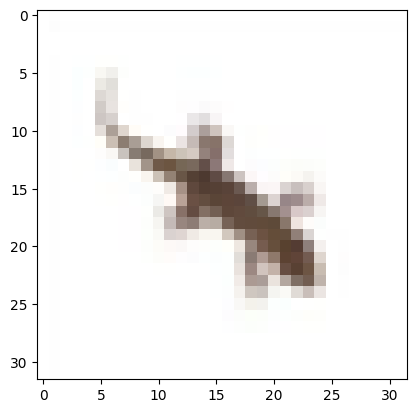

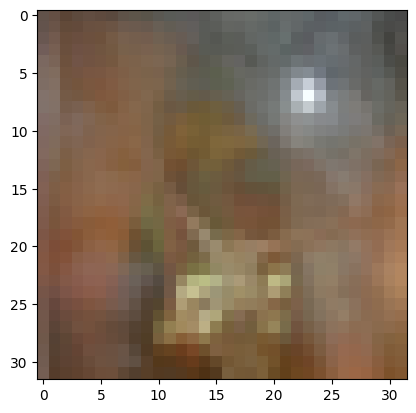

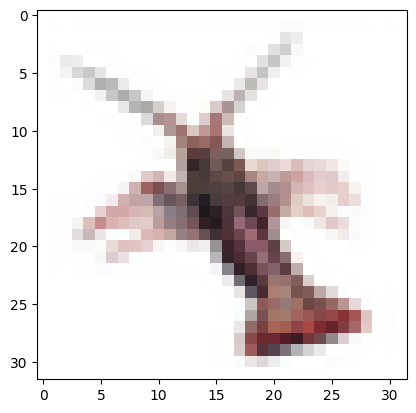

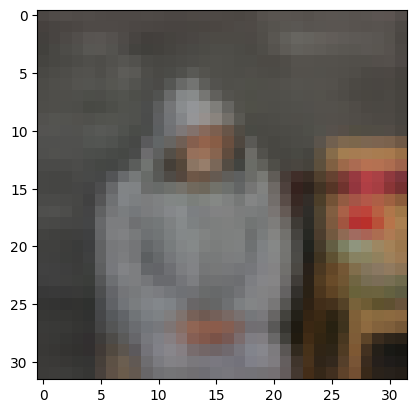

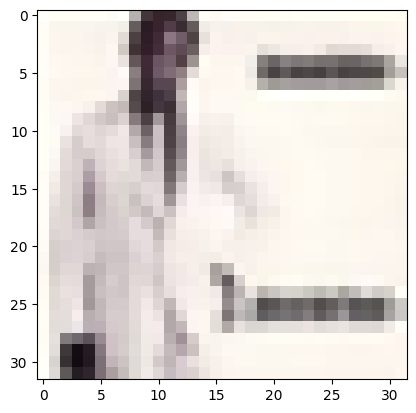

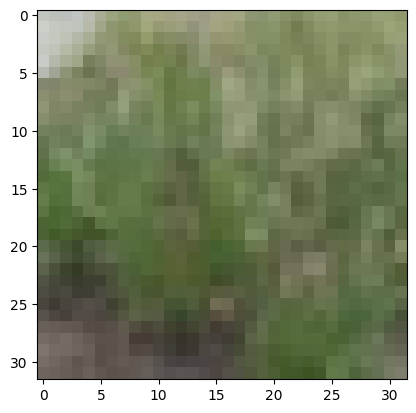

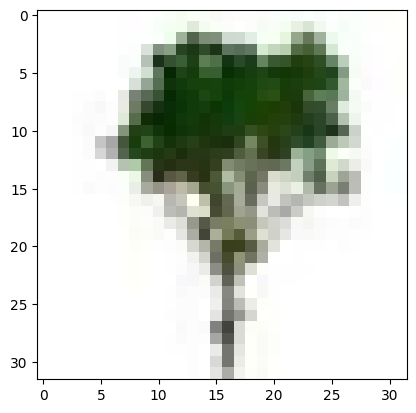

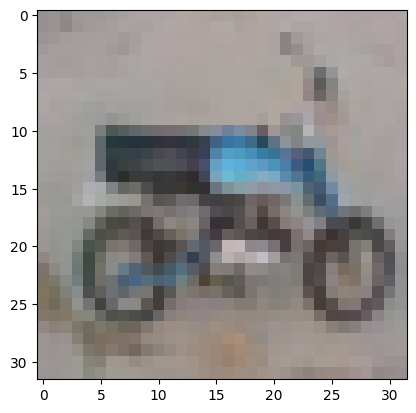

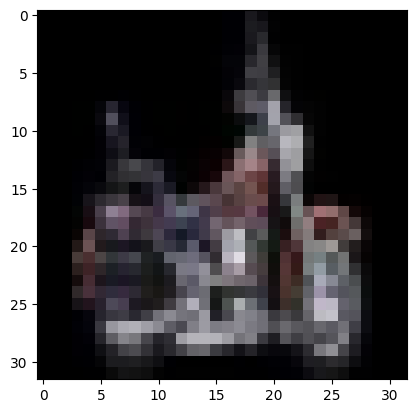

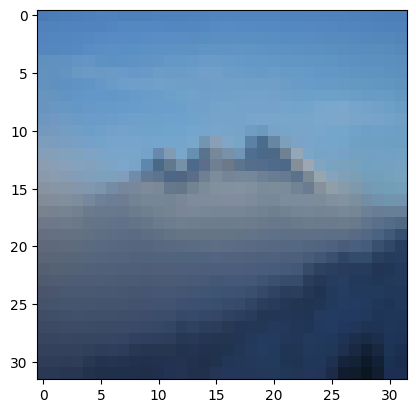

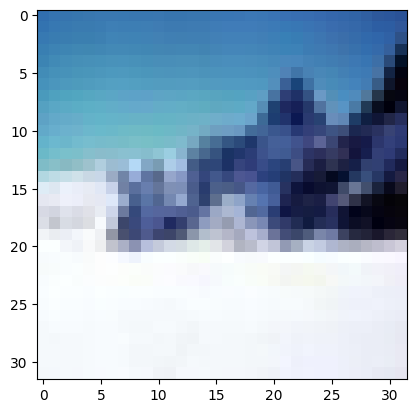

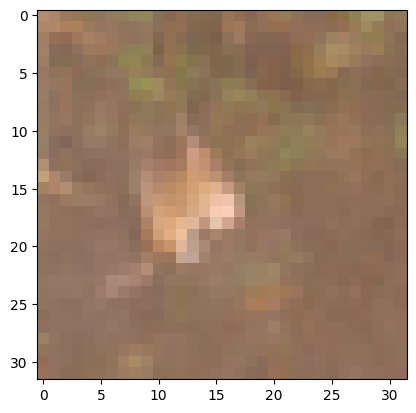

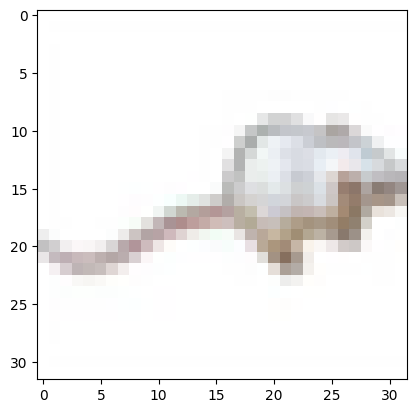

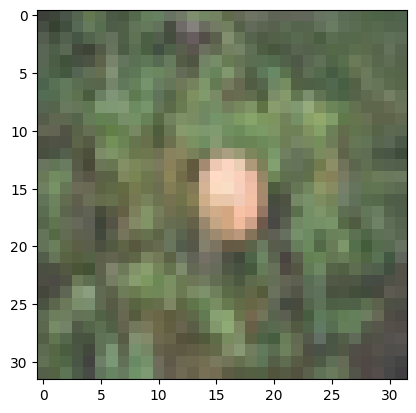

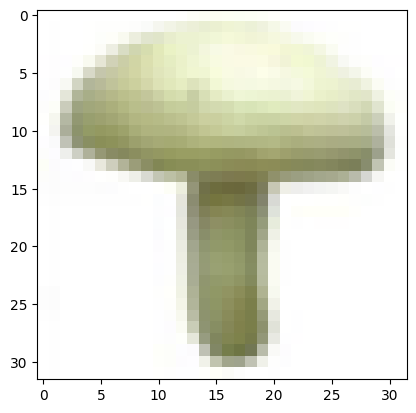

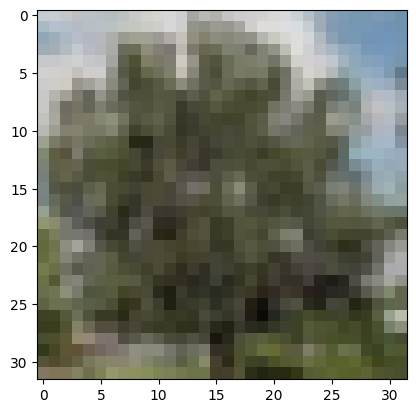

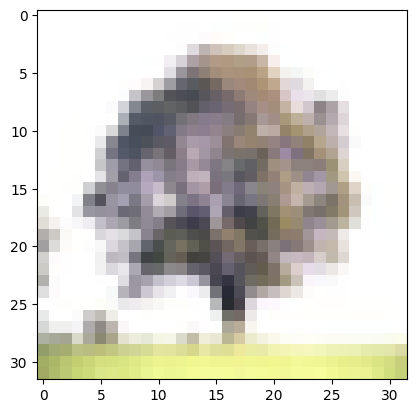

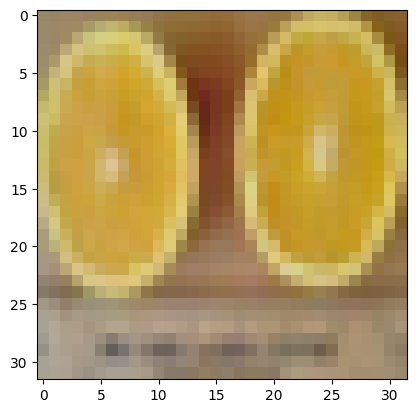

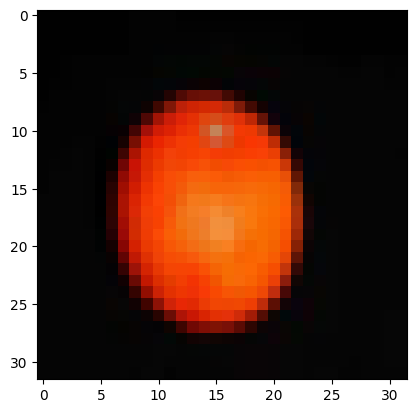

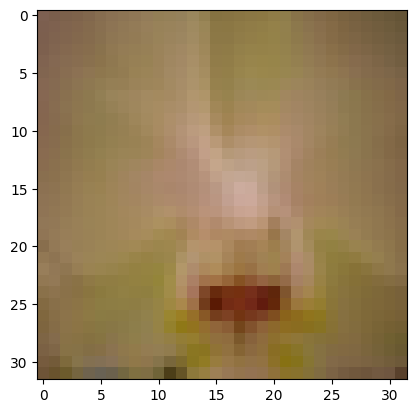

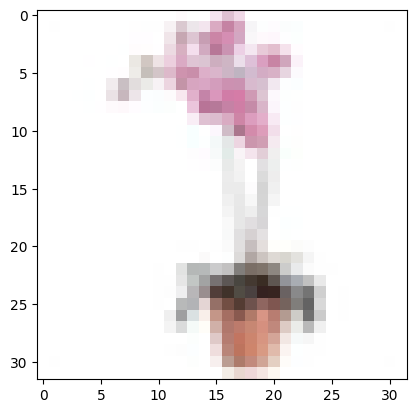

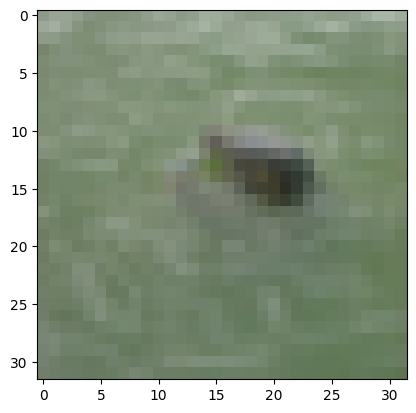

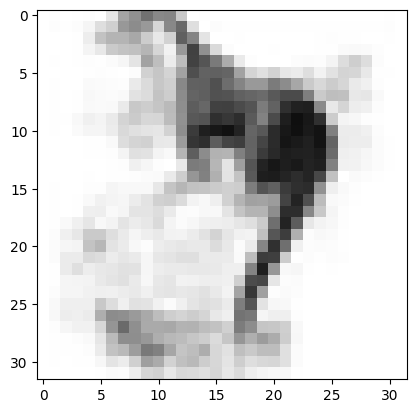

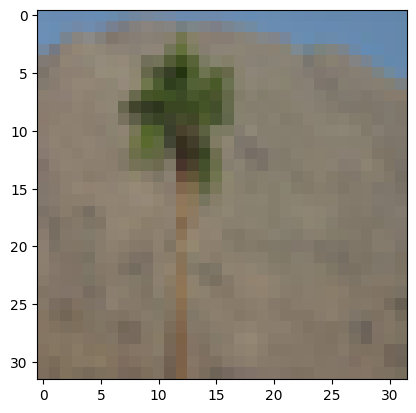

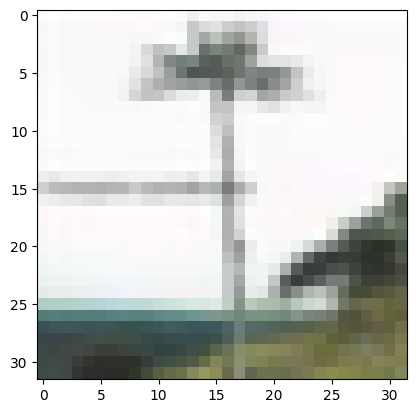

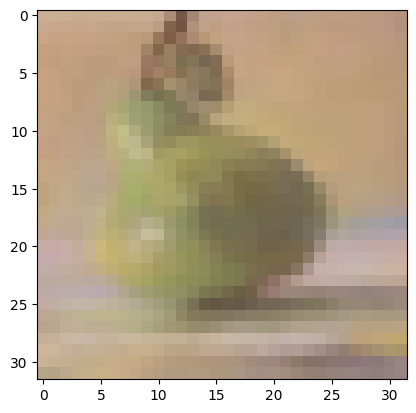

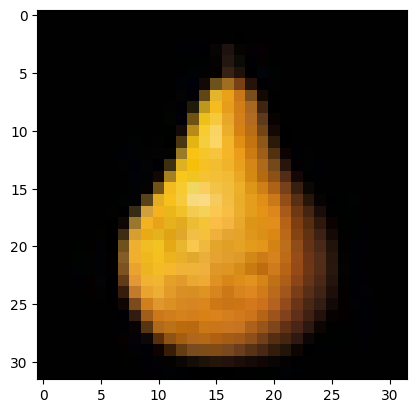

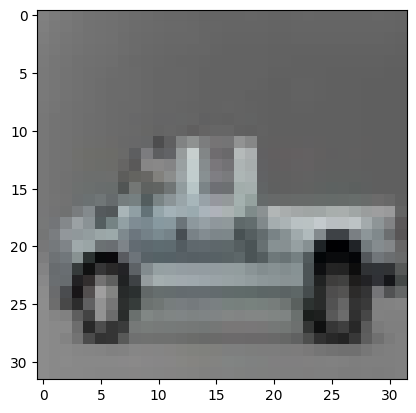

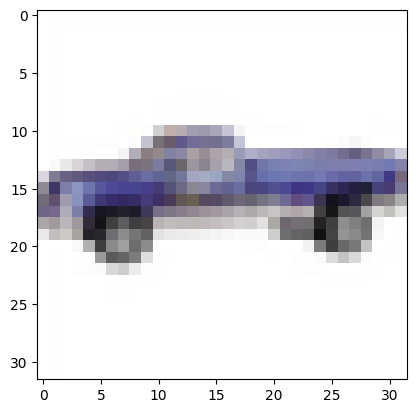

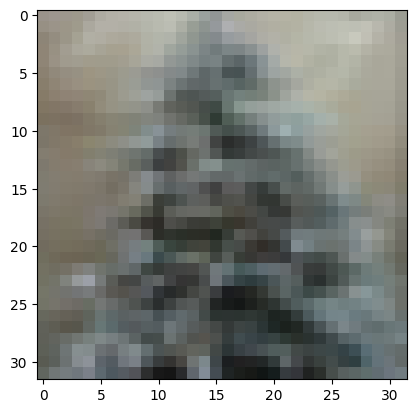

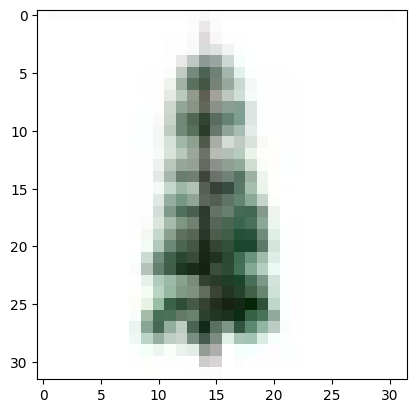

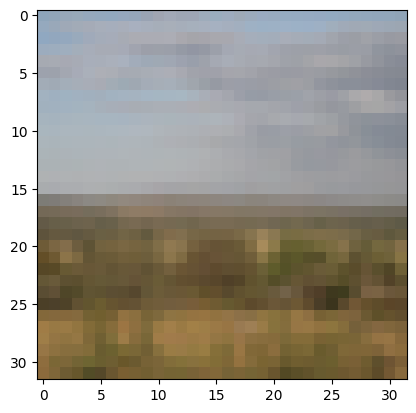

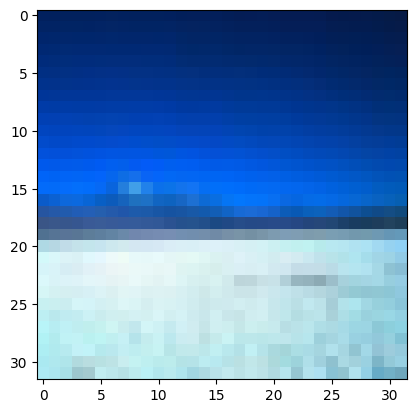

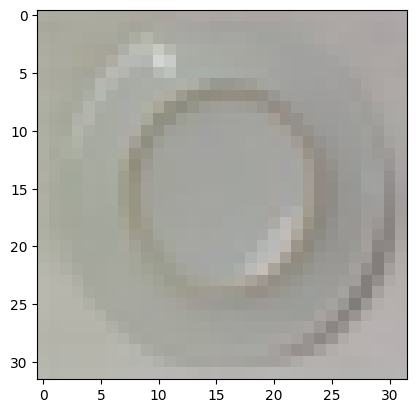

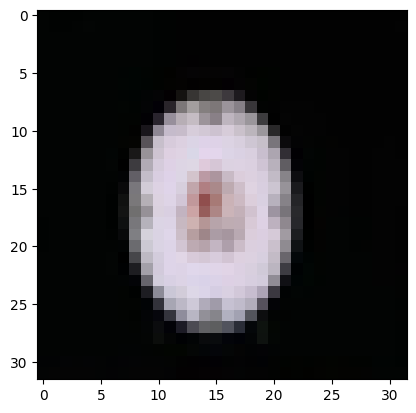

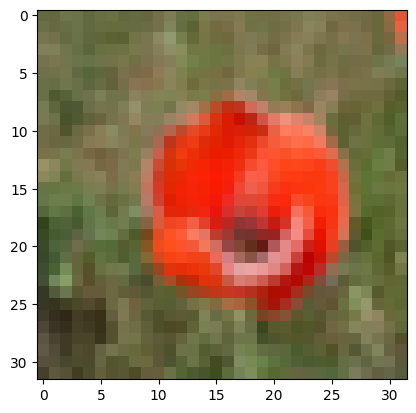

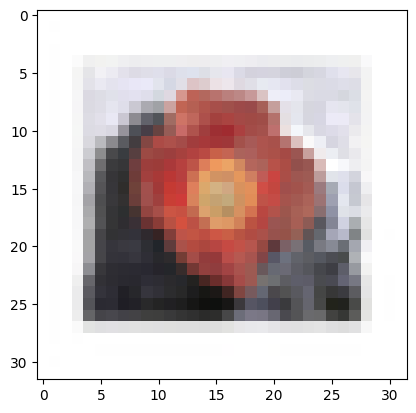

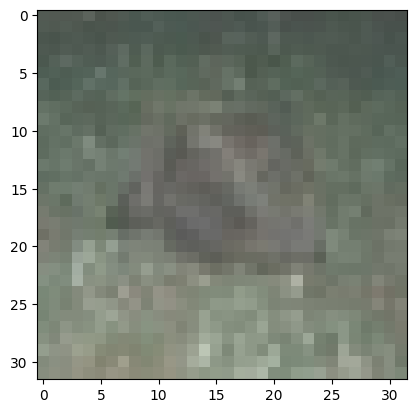

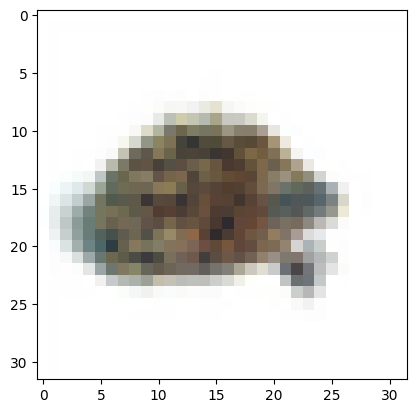

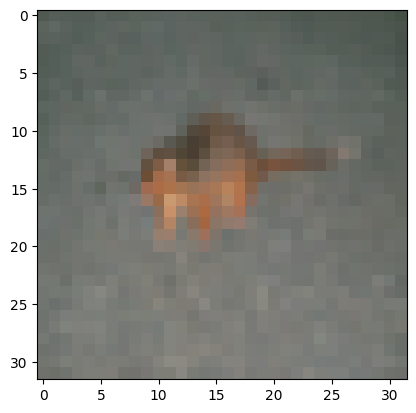

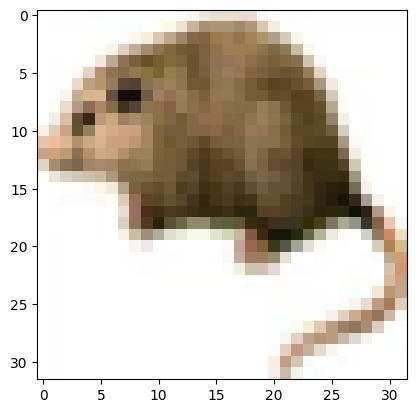

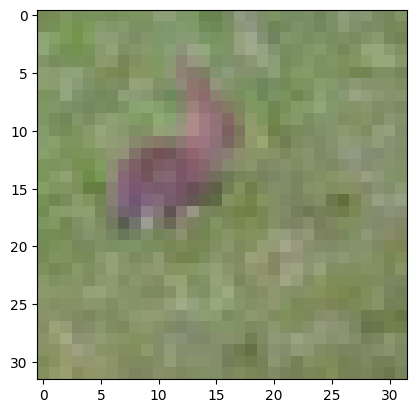

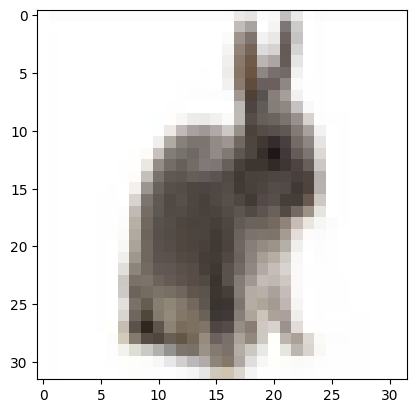

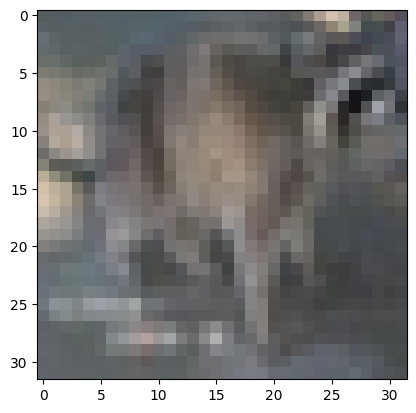

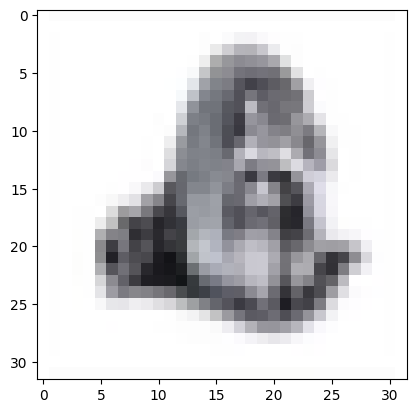

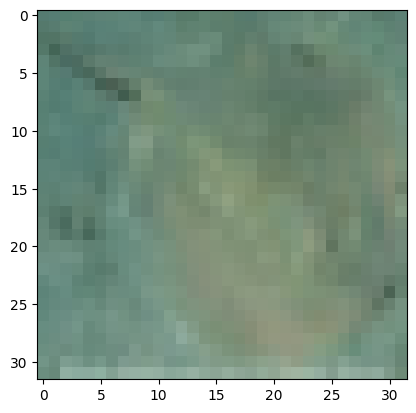

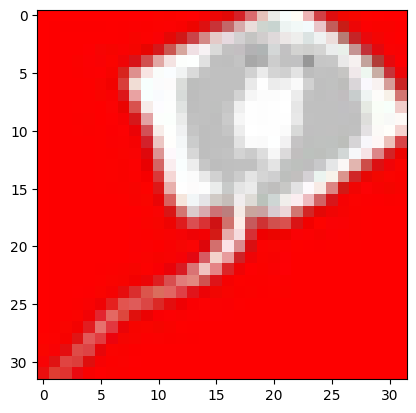

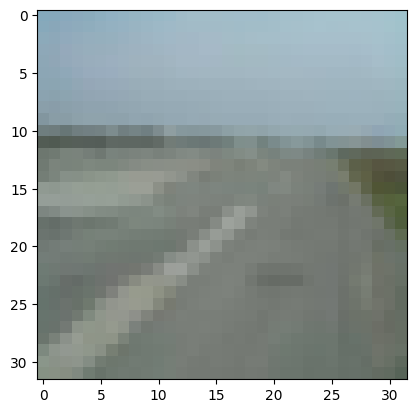

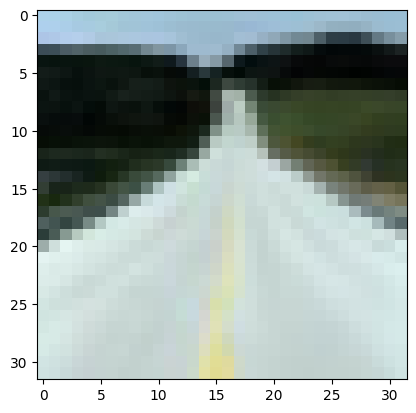

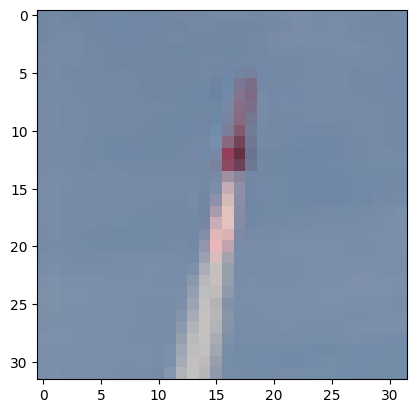

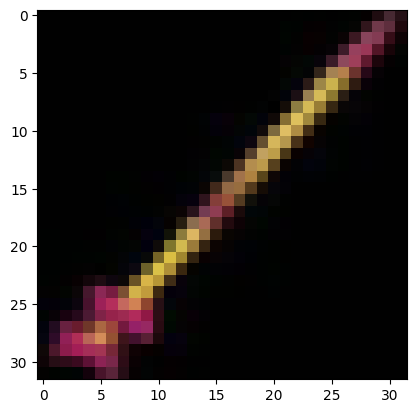

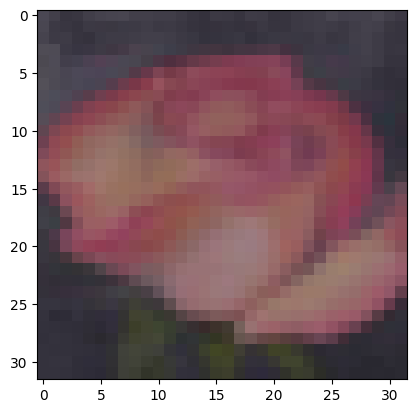

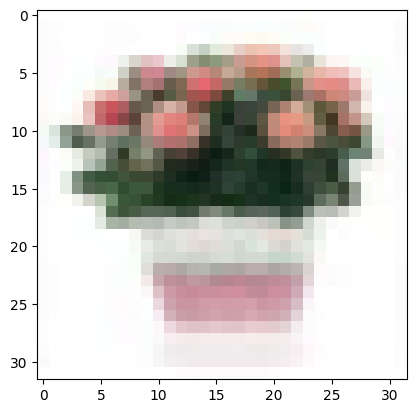

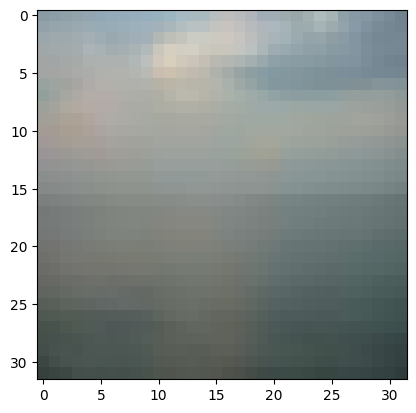

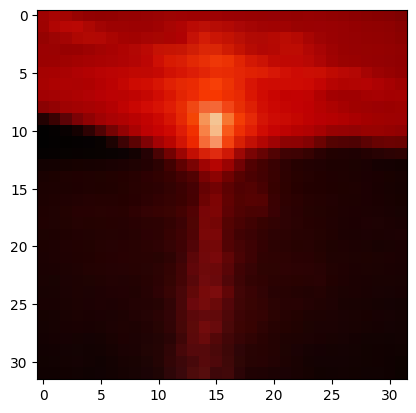

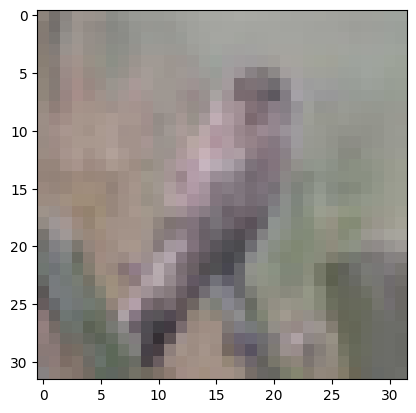

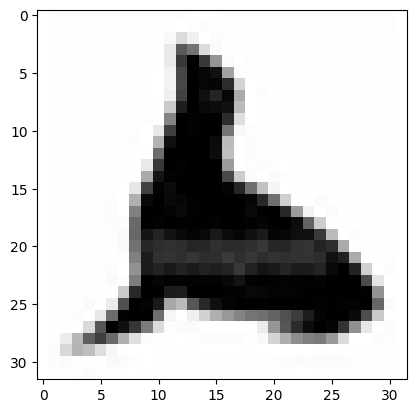

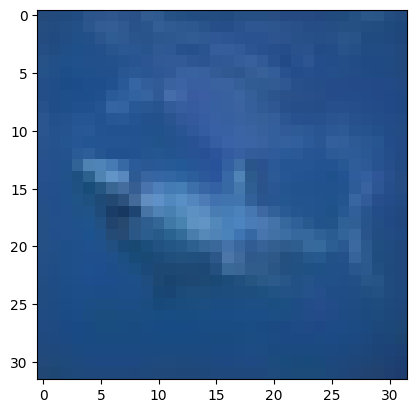

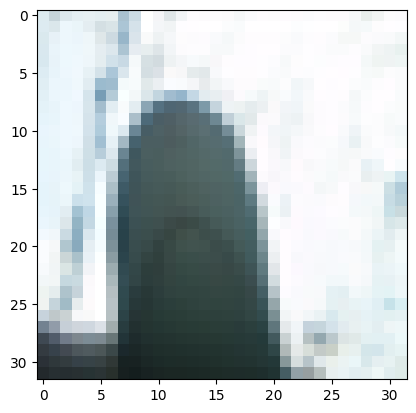

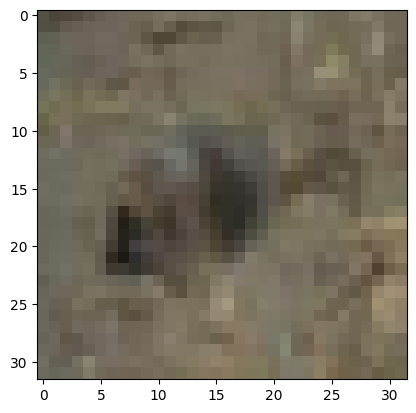

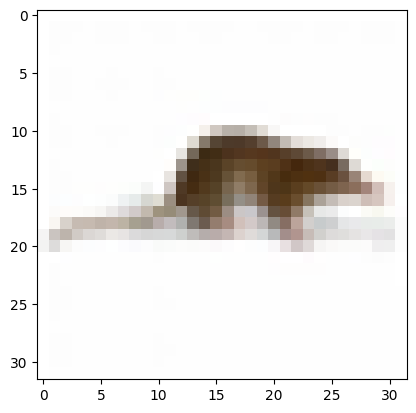

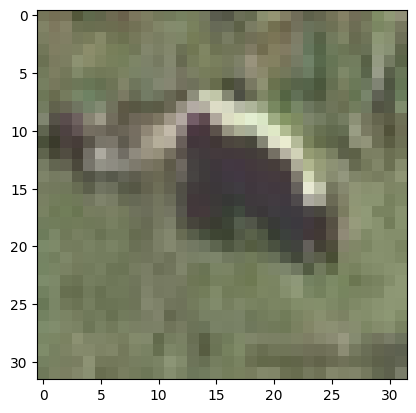

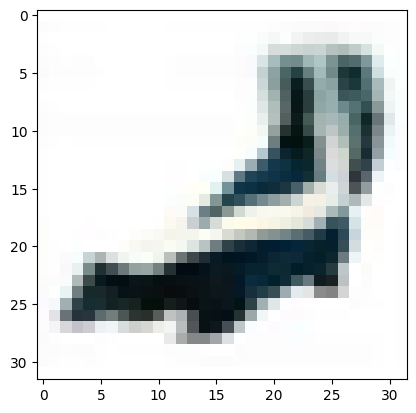

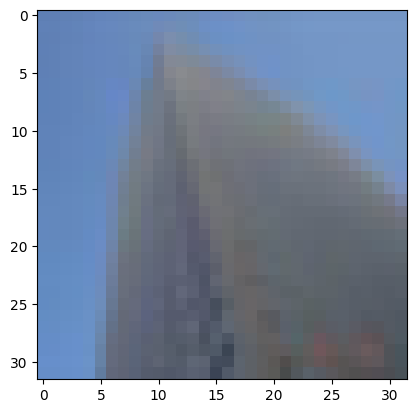

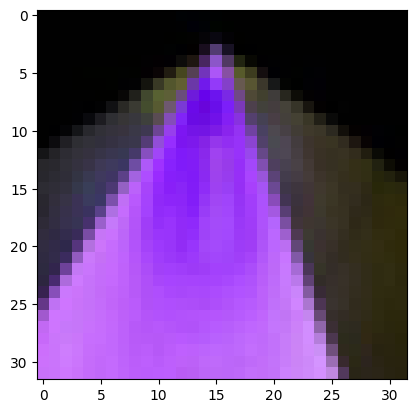

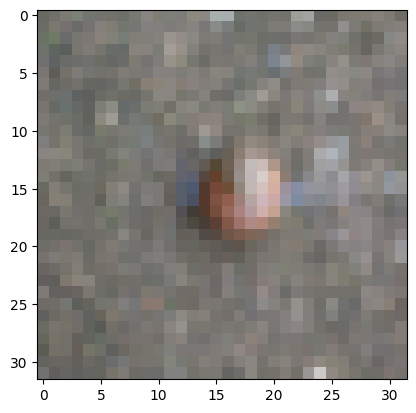

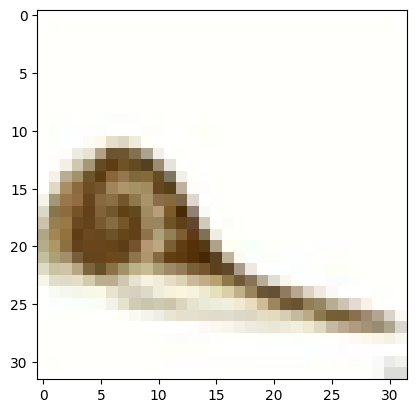

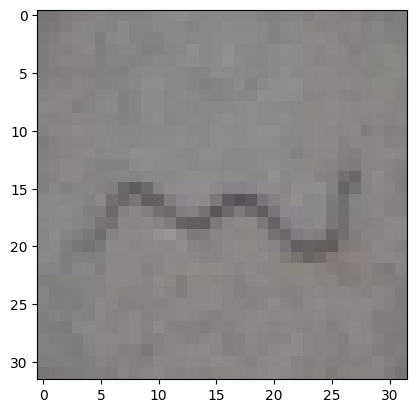

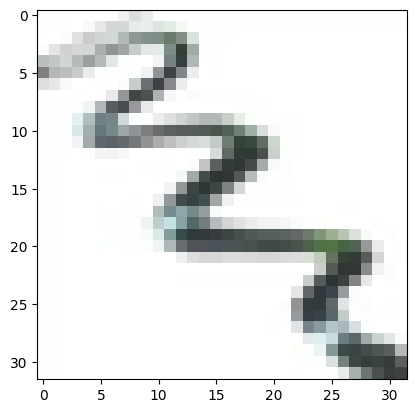

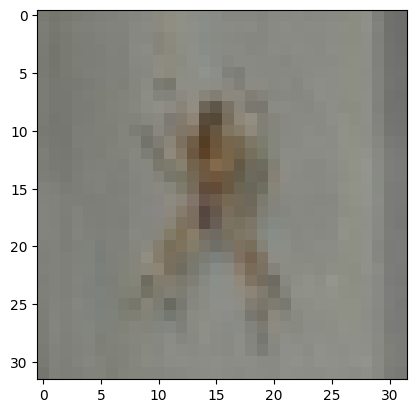

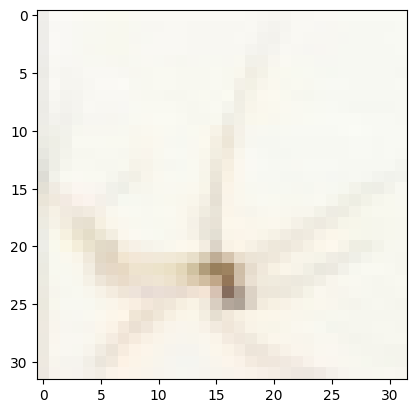

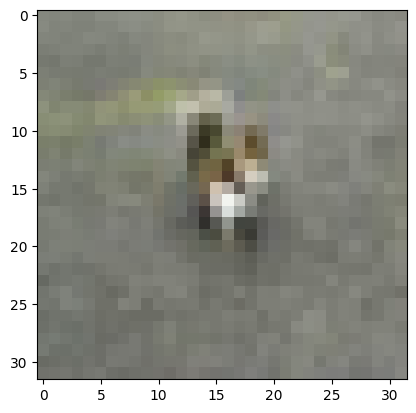

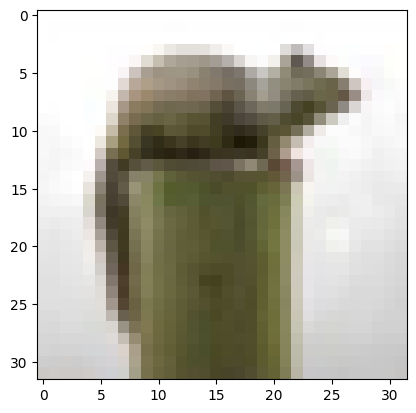

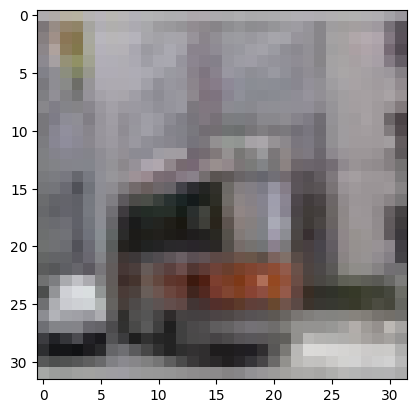

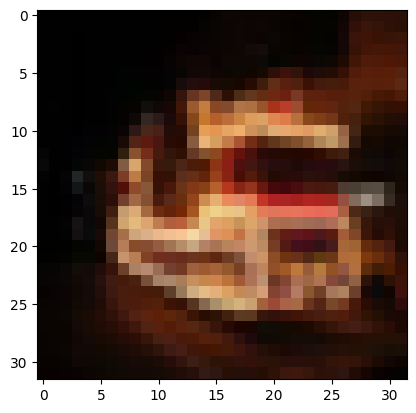

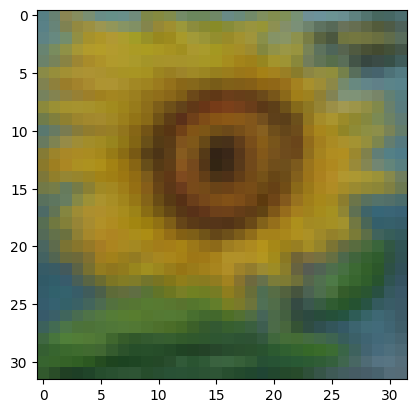

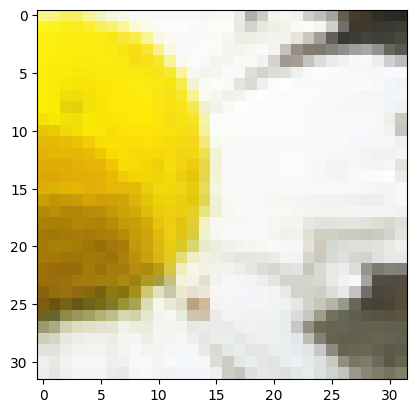

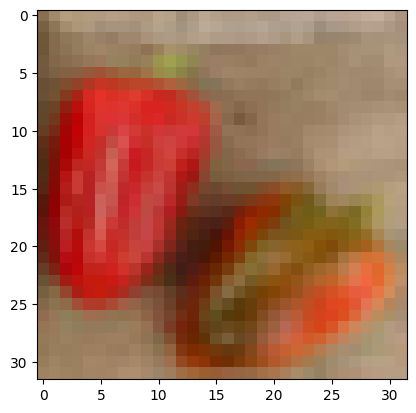

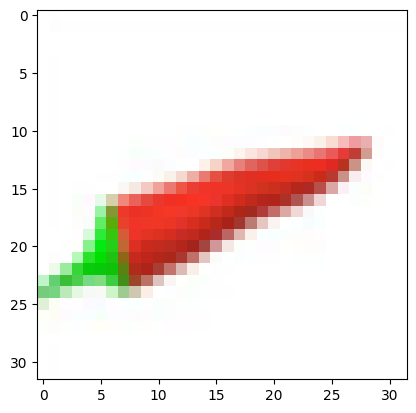

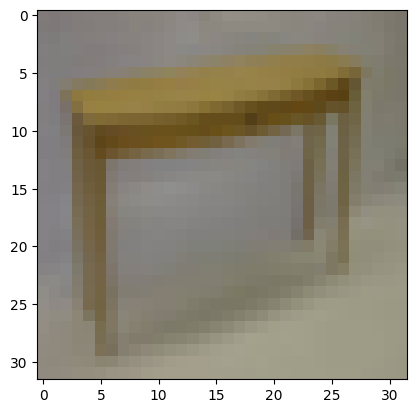

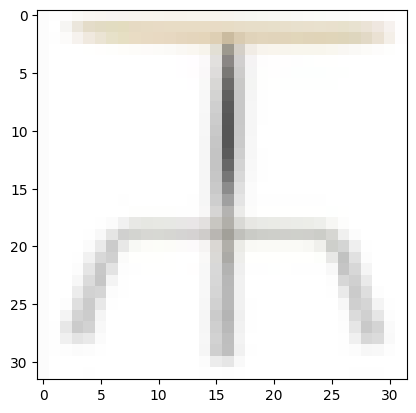

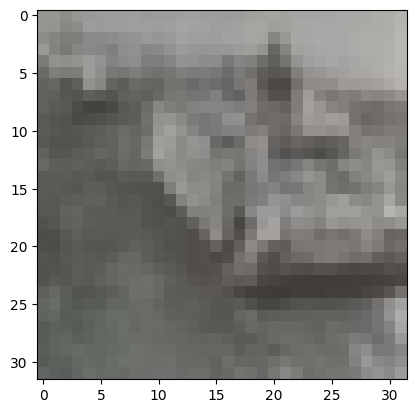

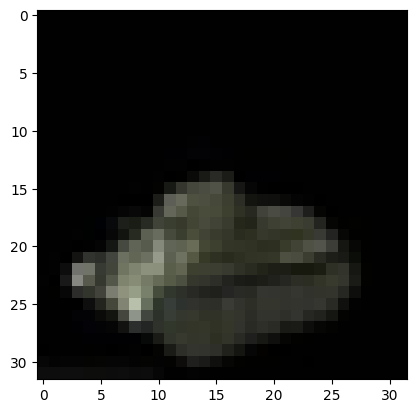

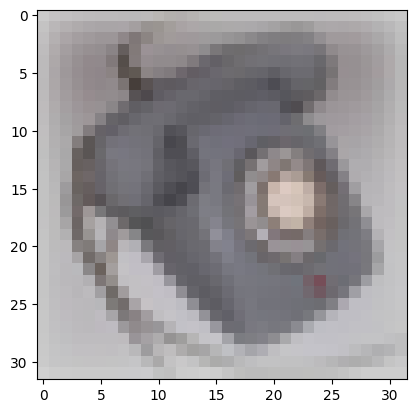

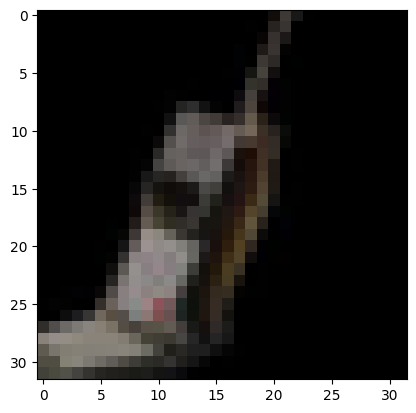

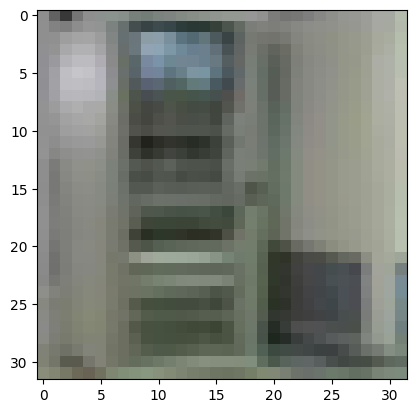

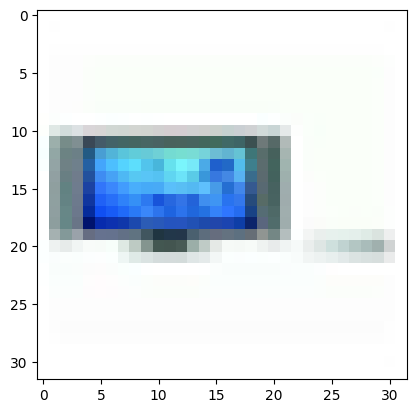

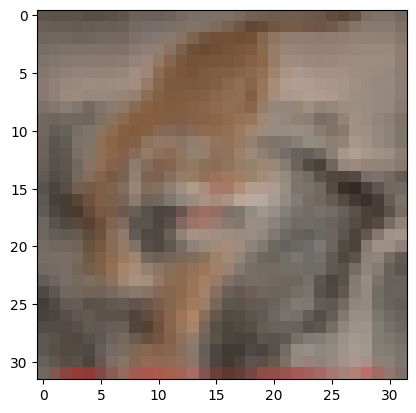

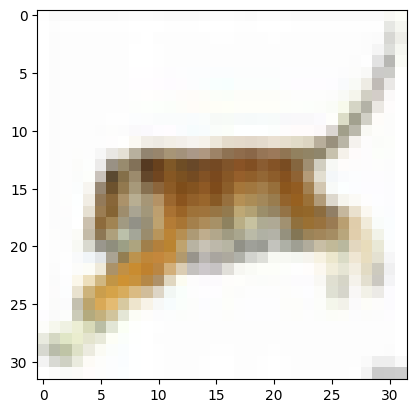

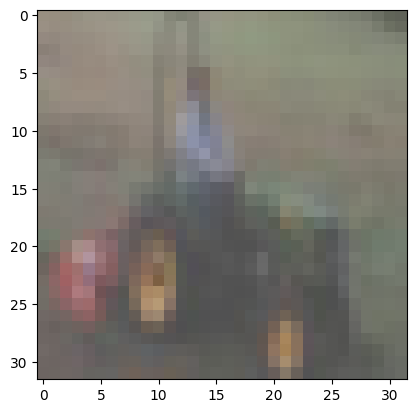

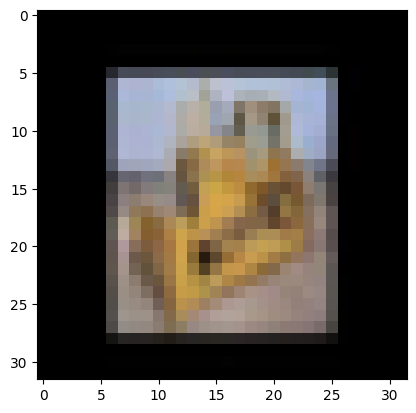

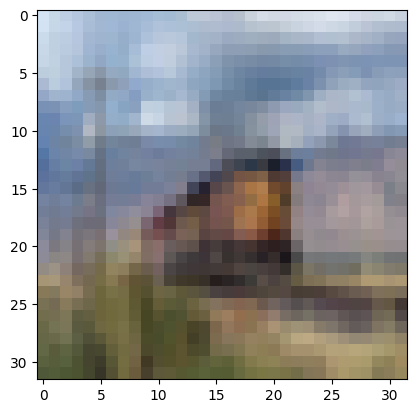

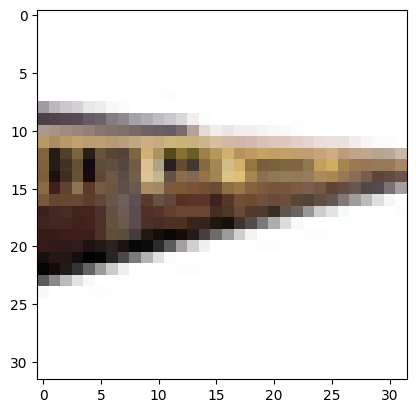

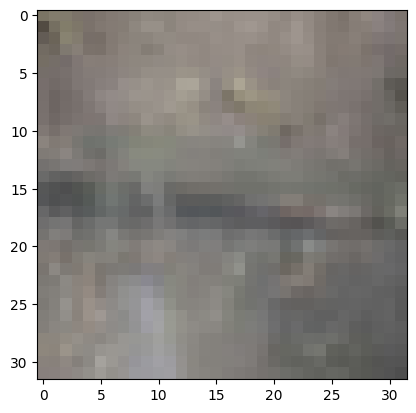

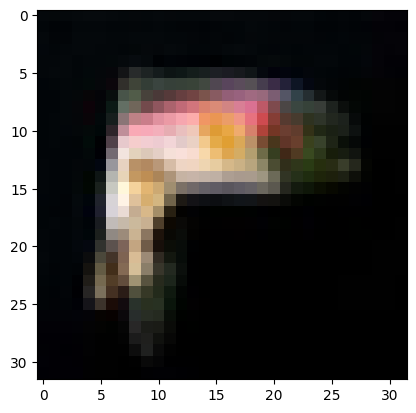

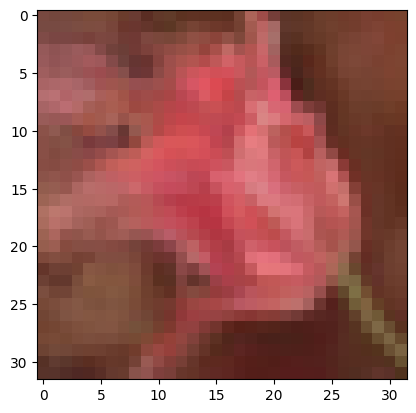

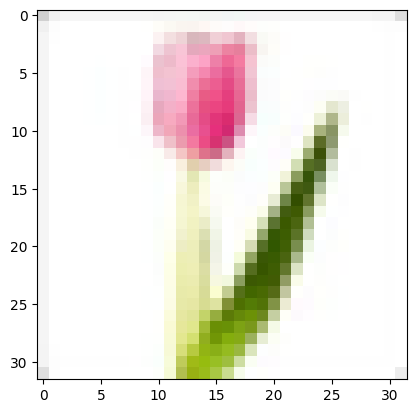

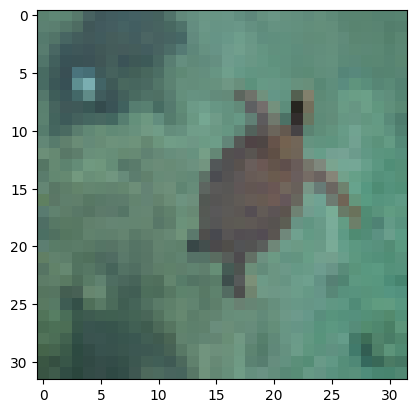

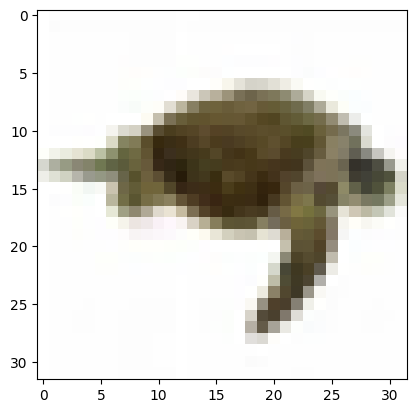

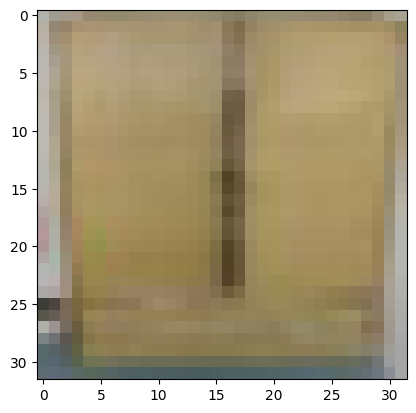

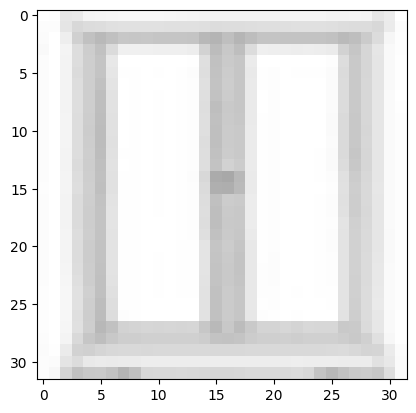

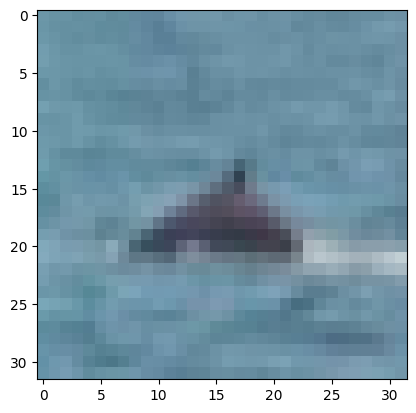

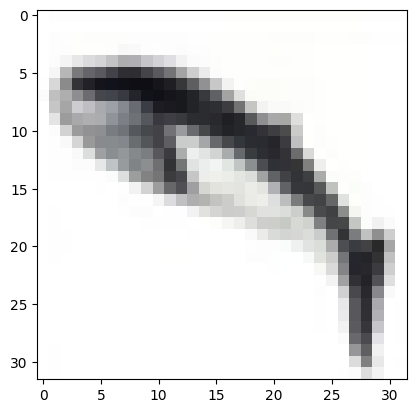

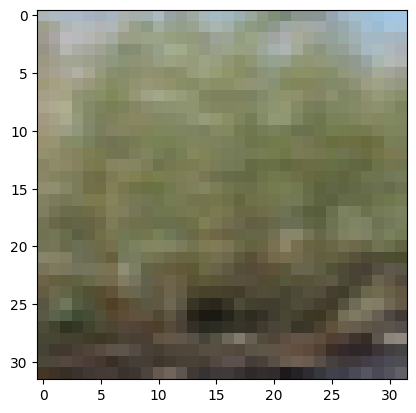

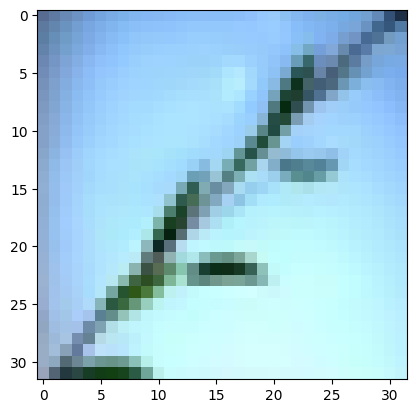

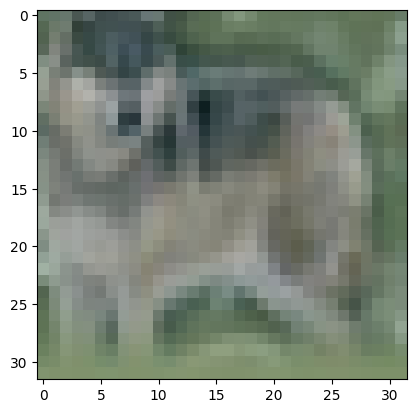

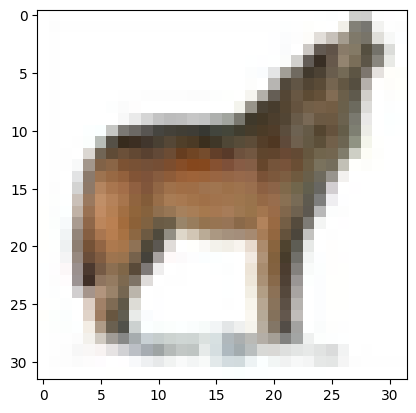

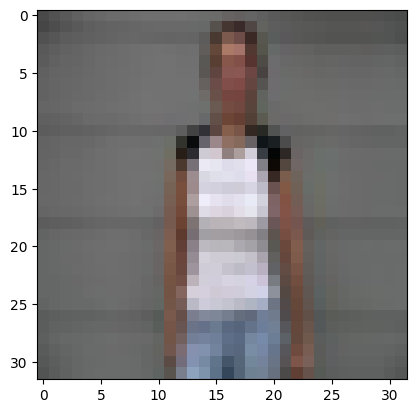

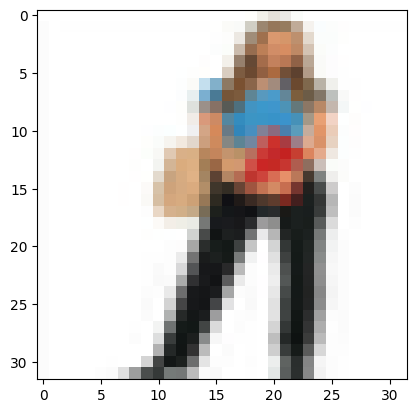

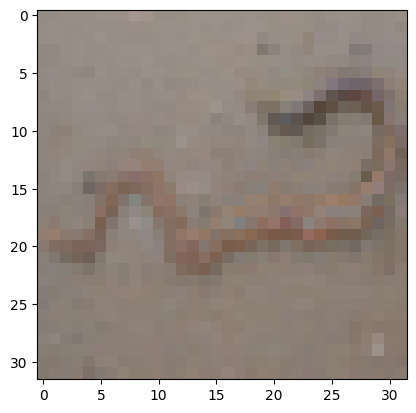

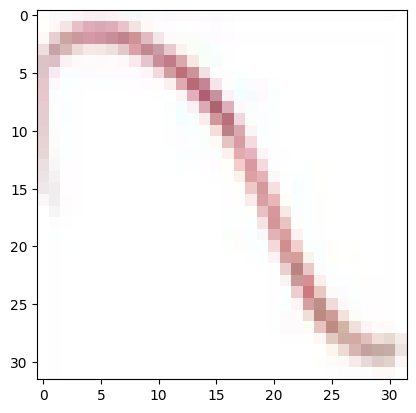

(50000, 32, 32, 3)
(50000, 1)


In [3]:
def order_images_by_dist_from_mean(X, Y):
    mean_image = tf.reduce_mean(X, axis=0)

    #calculate the distance of each image from the mean image
    
    distances = []
    
    for i in range(X.shape[0]):
        dist = tf.norm(X[i]-mean_image)
        distances.append(dist)
            
    #sort the images by distance from the mean image
    sorted_indices = tf.argsort(distances)
    sorted_images = tf.gather(X, sorted_indices)
    sorted_labels = tf.gather(Y, sorted_indices)
    
    return sorted_images, sorted_labels    

#for each class in Y_train, get the indices of the images in X_train that belong to that class
def get_class_indices(X, Y):
    class_indices = []
    for i in range(100):
        class_indices.append(tf.where(Y == i)[:,0])
    return np.array(class_indices)

class_indices = get_class_indices(X_train, Y_train)

#for each class, order the images by distance from the mean image of that class
ordered_images = []
ordered_labels = []

for i in range(100):
    ordered_images_class, ordered_labels_class = order_images_by_dist_from_mean(X_train[class_indices[i]], Y_train[class_indices[i]])
    
    #show the first and last image of the class
    plt.imshow(ordered_images_class[0])
    plt.show()
    plt.imshow(ordered_images_class[-1])
    plt.show()
    
    ordered_images.append(ordered_images_class)
    ordered_labels.append(ordered_labels_class)
    
#concatenate the ordered images and labels into X_train_ordered and Y_train_ordered
X_train_ordered = tf.concat(ordered_images, axis=0)
Y_train_ordered = tf.concat(ordered_labels, axis=0)

print(X_train_ordered.shape)
print(Y_train_ordered.shape)

#plot the first and last image from the first 10 classes




